# House Prices


##  Przeanalizowanie zadania
Moim zadaniem jest stworzenie modelu który bedzie przewidywał ceny kazdego domu na podstawie dostarczonego zbioru danych który zawiera róznorodne cechy związane z domami.

Zmienna docelowa ceny domów jest to wartość ciągła wiec zadanie jest problemem regresji

Metryka oceny bedzie pierwiastek błedu średniokwadratowego ( RMSE ) który jest średnią kwadratową róznic miedzy wartościami obserowanymi a wartościami przewidywanymi. Dowiadujemy sie dzeki niemu, w jakim stopniu model myli sie w przewidywaniach, wraz ze wzrostem wartości błedu rośnie waga tego wskaźnika


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Wczytywanie danych

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


### Analiza danych

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
129,130,20,RL,69.0,8973,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,7,2006,WD,Abnorml,150000
720,721,120,RL,NaN,6563,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,275000
550,551,120,RL,53.0,4043,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,140000
725,726,20,RL,60.0,6960,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,11,2009,WD,Normal,120500
1129,1130,90,RM,60.0,7200,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,140000
565,566,70,RL,66.0,6858,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,128000
490,491,160,RM,NaN,2665,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,115000
267,268,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,179500
193,194,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,130000
1221,1222,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,134000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [7]:
# pd.set_option('display.max_rows',None) #Pokazuje wszystkie wiersze bez zadnego limitu
#wybiera tylko te kolumny z test.isnull().sum() które maja wartość True w masce utworzonej na podstawie train.isnull().sum() >=1
missing_values = train.isnull().sum()[train.isnull().sum()>= 1].sort_values(ascending= False)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
test.isnull().sum()[train.isnull().sum() >=1]

LotFrontage      227
Alley           1352
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
Electrical         0
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64

In [11]:
test.dtypes.value_counts()

object     43
int64      26
float64    11
Name: count, dtype: int64

In [12]:
list_object = test.dtypes[test.dtypes== 'object'].index.tolist()
list_object

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### Wnioski

- W zbiorze treningowym znajduje sie 1460 wierszy i 81 cech
- W zbiorze testowym znajduje sie (145 i, 8 cech (zostala usunieta wartosc docelowa)
- Typy danych ktore znajduja sie zbiorze treningowym:
    1. object 43 -  to zmienne kategorialne
    2. int6  3 - zmienna liczby całowitej
    3.
float3   - zmienna liczby zmienno przecinkowej
- W 19 cecha w zbiorze treningowym brakuje wartosci
- Liczne brakujące wartości w kolumnach takich jak Alley, FireplaceQu, PoolQC
 - Typy danych ktore znajduja sie zbiorze testowym:
    1. object: 43 to zmienne kategorialne
    2. int64: 26 zmienna liczby całowitej
    3. float64: 11 zmienna liczby zmienno przecinkowe)

### Wizualizacja danych

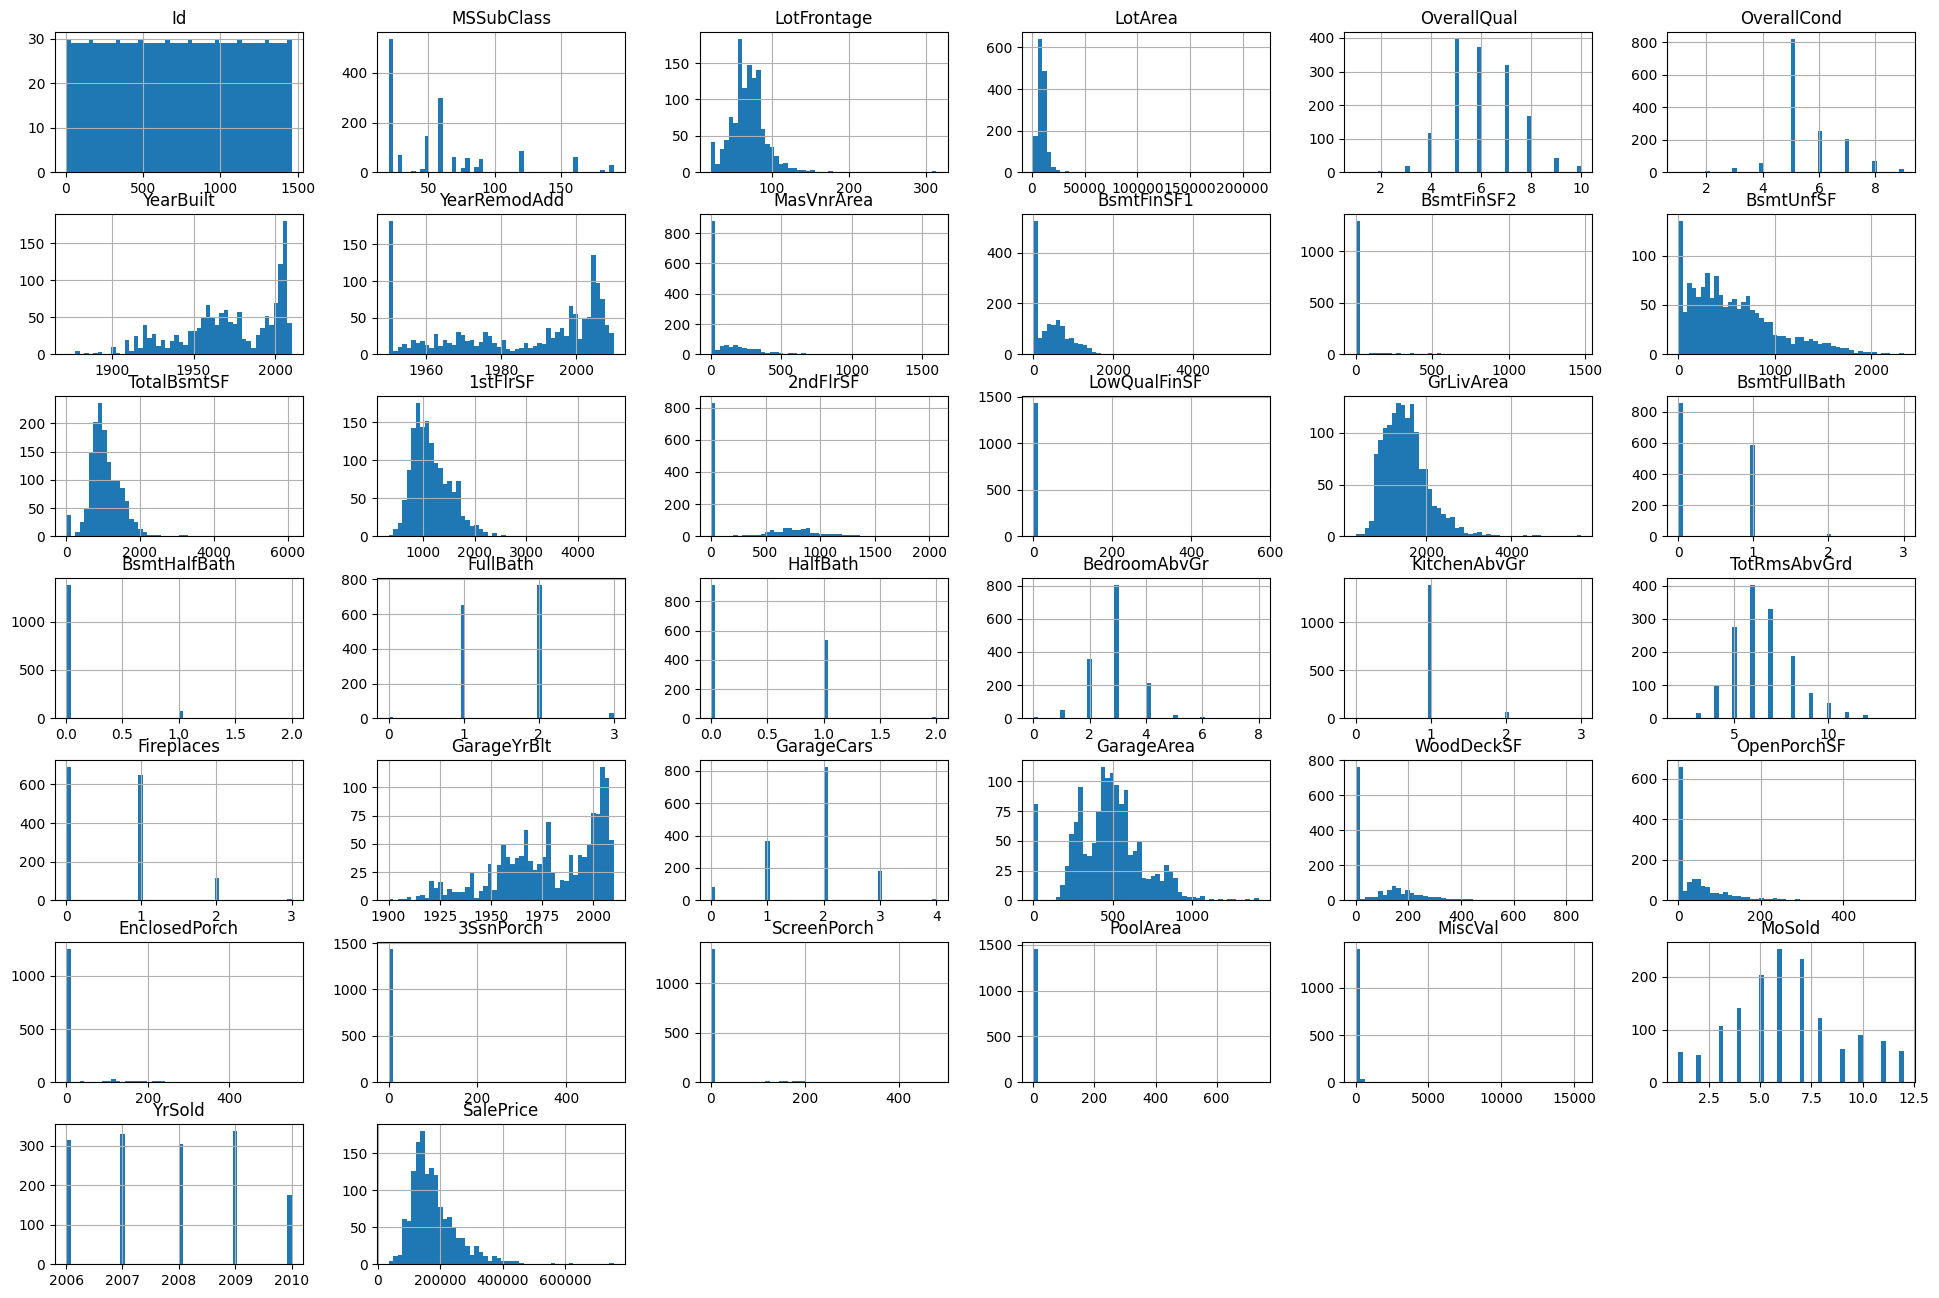

In [13]:
train.hist(bins = 50, figsize = (24,16))
plt.show()

#### Rozkład zmiennej docelowej

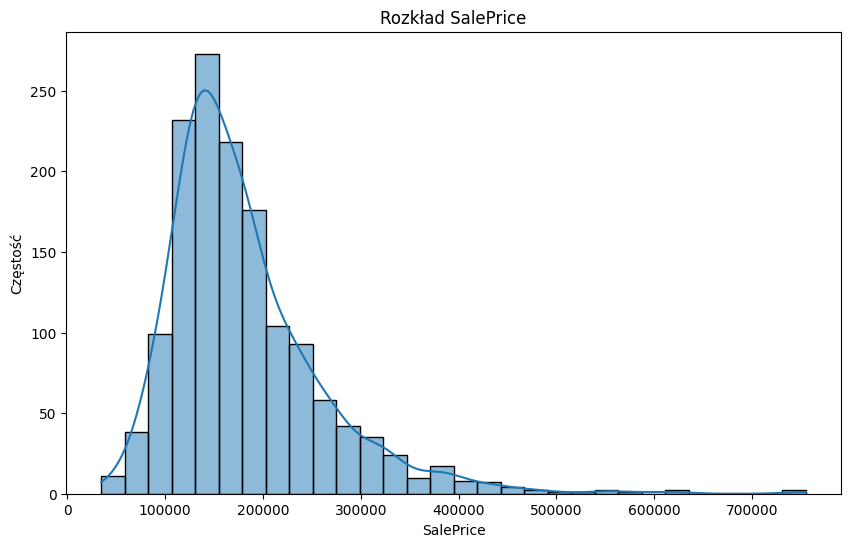

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'],kde = True, bins= 30)
plt.title('Rozkład SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Częstość')
plt.show()

Wnioski

- Rozkład jest prawostronnie asymetryczny (prawoskośny), co oznacza ze wieksza  cześć danych koncentruje sie w niższych wartosciach od 100 000 do 250 000
- Rozkład jest jednomodalny poniewaz posiada jeden wyraźny szczyt w okolicach wartości 150 000- 200 000, oznacza to ze większość cen domów w zbiorze danych mieści sie w tym przedziale

Asymetryczność ma negaywny wpływ na działanie niekótrych modeli regresji,takich jak regrsja liniowa które zakładaja normalność rozkładu zmiennej docelowej.

<Axes: xlabel='LogSalePrice', ylabel='Count'>

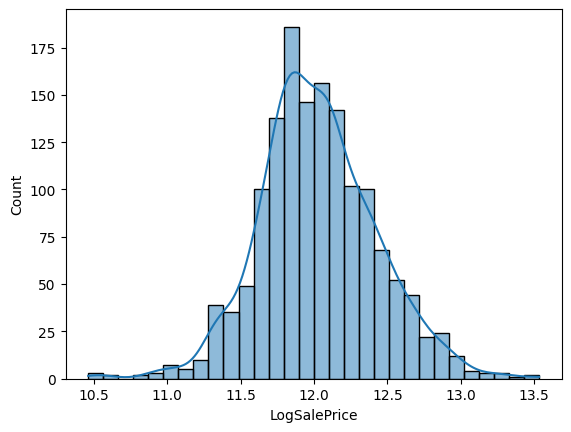

In [15]:
train['LogSalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(train['LogSalePrice'], kde=True, bins=30)

#### Wnioski

- Rozład jest bardziej symetryczny i zbliżony do normalnego (rozkładu Gaussa), oznacza to ze dane po transformacji lepiej spełniaja założenia normalnosci co wpłynie korzystniej na algorytmy uczenia maszynowego, takich jak regresja liniowa.
- wysokie ceny, które wczesniej znajdowały sie na prawym koncu rozkładu i wpływaja na asymetrie zostały skompresowane w bardzie zwartej formie przez co ich wpływ na modelowanie jest teraz ograniczony
- dominujacym przedziałem jest 12 co odpowiada rzeczywistej wartosci ceny
- rozkład normalny jest zblizony do normalnego. zastosowanie tej transrmacji poprawi predykcje

Funkcja wykonuje logarytm naturalny (logarytm w podstawie e) dodoając 1 do wartości wejściowej przed wykonaniem logarytmu co pozwala uniknąc błedu logarytmowania wartości 0 (prowadzi do nieskonczoności )

#### Relacja między YearBuilt (rok budowy) a SalePrice (cena sprzedaży)

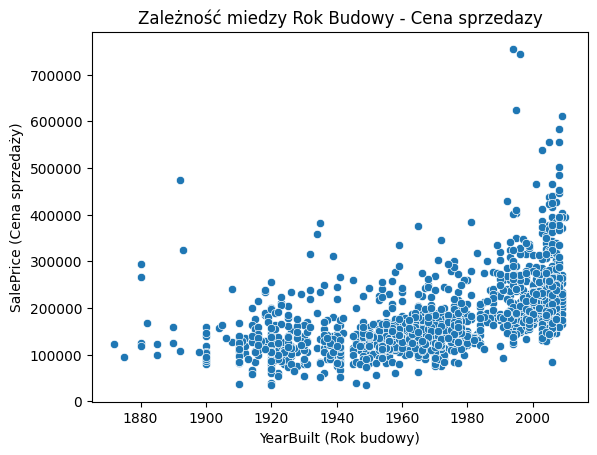

In [16]:
sns.scatterplot(x= train['YearBuilt'],y= train['SalePrice'])
plt.title('Zależność miedzy Rok Budowy - Cena sprzedazy')
plt.xlabel('YearBuilt (Rok budowy)')
plt.ylabel('SalePrice (Cena sprzedaży)')
plt.show()

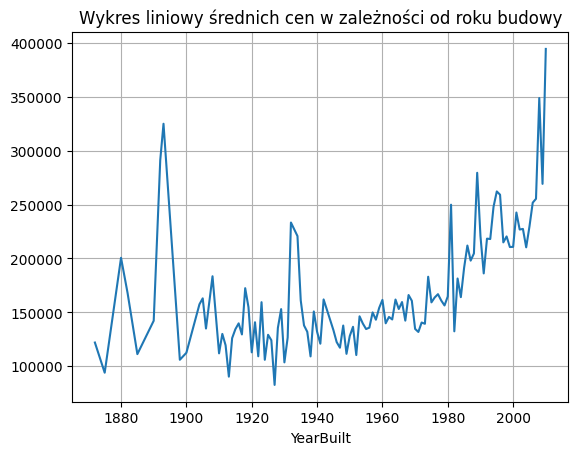

In [17]:
avg_price_by_year = train.groupby('YearBuilt')['SalePrice'].mean()
avg_price_by_year.plot(kind = 'line')
plt.title('Wykres liniowy średnich cen w zależności od roku budowy')
plt.grid()
plt.show()

#### Wnioski
- Ceny domow maja ogolną tendencje wzrostową 
- Ceny domów w okolicach roku 2000 rosna co jest logiczne poniewaz nowsze budynki zwykle mają lepsze standardy 
- Najwiecej domów zostało zbudowanych miedzy 1950 - 2000 co zoznacza ze był to okres intensywnego rozwoju budowlanego
- Istnieje kilka wyjątków:
    - kilka domów zdudowanych miedzy 1880-1900 które przekraczaja cene 300 000 co oznacza ze domy te maja jakas wartosc historyczna
    - kilka domow zbudowanych po 2000 jest bardzo drogich (powyżej 700 000) co oznacza ze to luksusowe rezydencje 

#### Rozkład dzielnic

<Axes: xlabel='Neighborhood'>

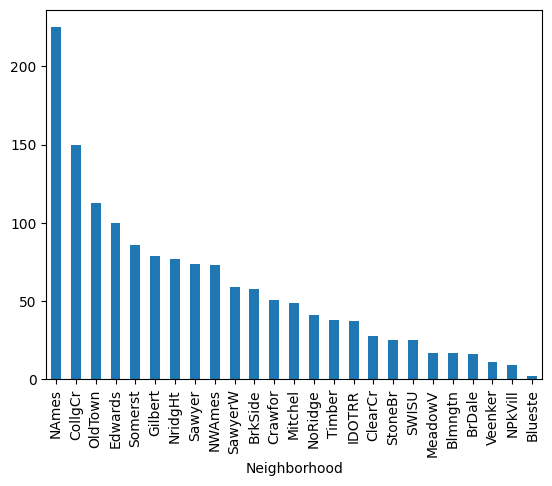

In [18]:
train['Neighborhood'].value_counts().plot(kind= 'bar')


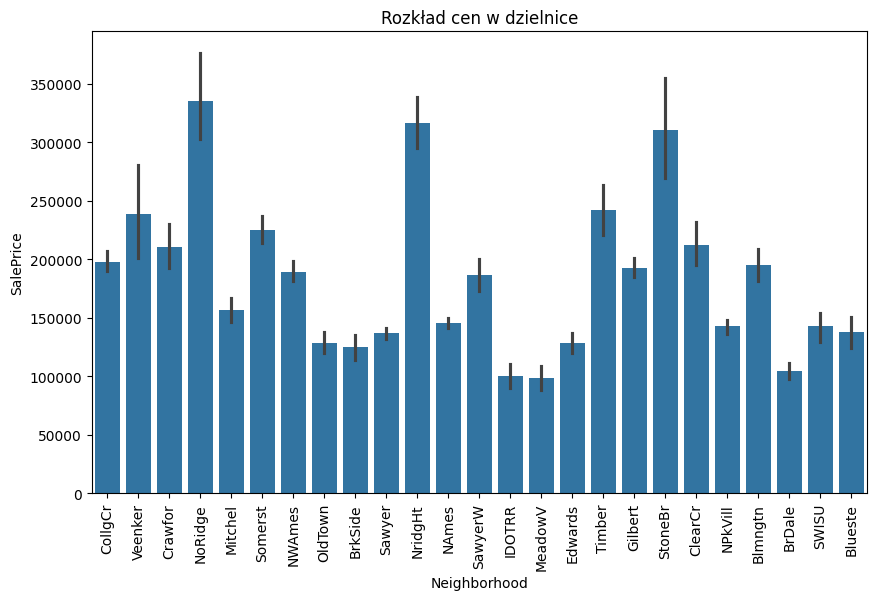

In [19]:
plt.figure(figsize= (10,6))
sns.barplot(x= train['Neighborhood'],y=train['SalePrice'])
plt.title('Rozkład cen w dzielnice')
plt.xticks(rotation=90)
plt.show()

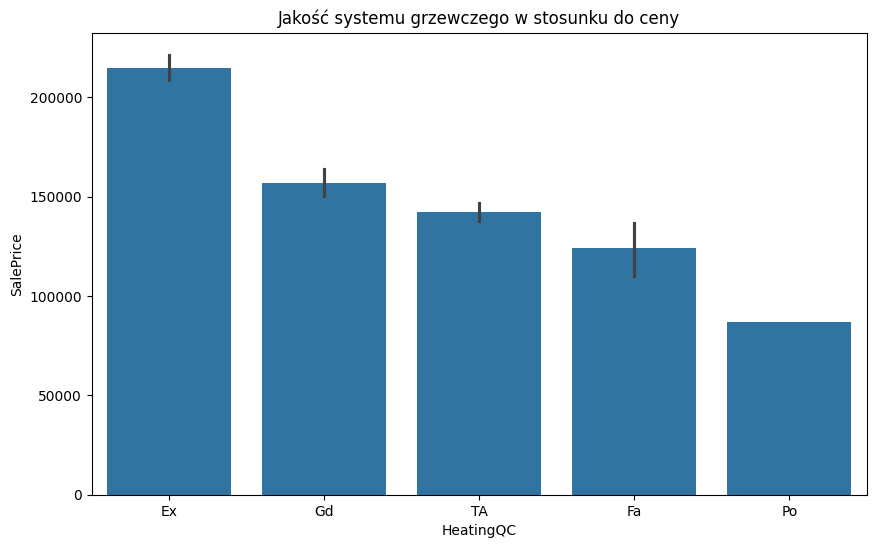

In [20]:
plt.figure(figsize= (10,6))
sns.barplot(x= train['HeatingQC'],y=train['SalePrice'])
plt.title('Jakość systemu grzewczego w stosunku do ceny')
plt.show()


#### Wykres braków

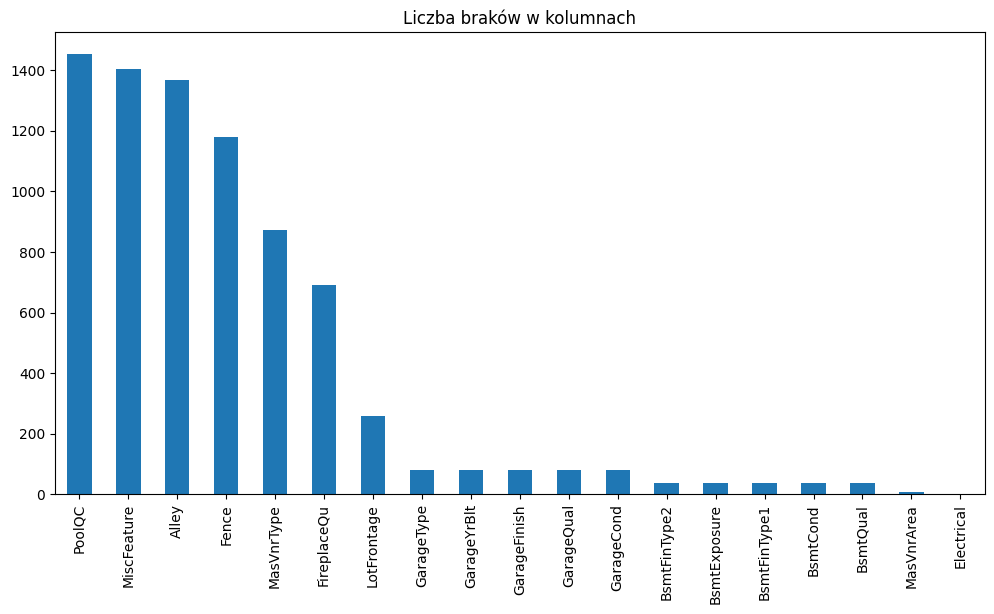

In [21]:
missing_values.plot(kind= 'bar',figsize= (12,6))
plt.title('Liczba braków w kolumnach')
plt.show()

#### Wnioski
Kolumny po lewej stronie wykresu mają najwiecej braków a im dalej w prawo, tym liczba braków maleje. 

Niektóre kolumny maja bardzo dużą liczbe braków, rozważe ich usuniecie.

## Przygotowywanie danych

Dane zmiennych kategorycznych zamienie za pomoca  One-Hot Encoding poniewaz:
- jest to odpowieni sposób dla zmiennych które nie mają naturalnego porzadku
- dzieki temu sposobowi kodowania zmiennych model nie zakłada fałszywej hierarchii miedzy wartościami w przeciwieństwie do Label Encoding gdzie liczby mogą sugerowac porzadek 
- One-Hot Encoding zwraca macierz rzadką


### Kolumna MSSubClass
Klasa nieruchomości

In [22]:
train['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

### Kolumna MSZoning (Strefa funkcjonalna)

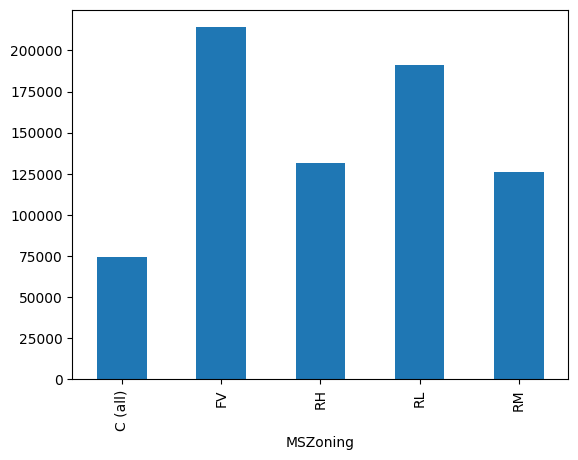

In [23]:
train.groupby('MSZoning')['SalePrice'].mean().plot(kind= 'bar');

In [24]:
train['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

### Kolumna LotFrontage 
(Długość frontu działki) wypełnie puste miejsca srednia 


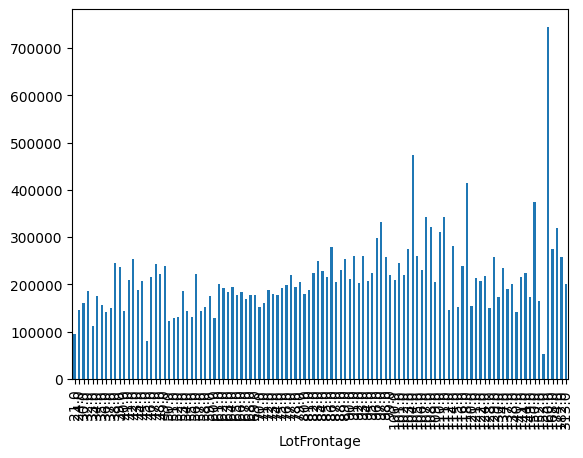

In [25]:
train.groupby('LotFrontage')['SalePrice'].mean().plot(kind= 'bar');

In [26]:
train['LotFrontage']= train['LotFrontage'].fillna(0)
test['LotFrontage']= test['LotFrontage'].fillna(0)


In [27]:
train[train['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice


### Kolumna LotArea
Powierzchnia działki

### Kolumna Street (Rodzaj ulicy)
użyje One Hot Encoder

In [28]:
train['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

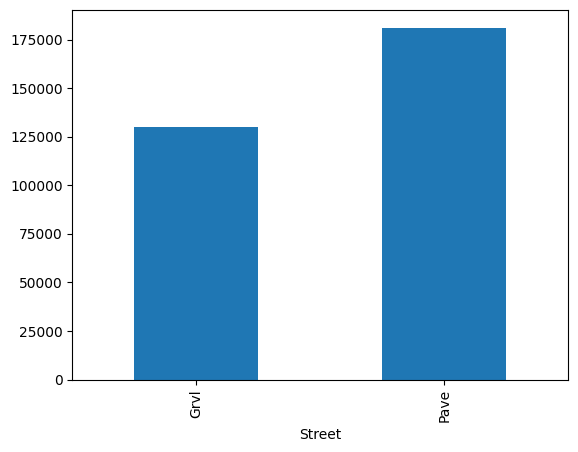

In [29]:
train.groupby('Street')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Alley (Rodzaj ulicy bocznej)
- One Hot Encoder
- Puste miejsca wypełnie wartościa None

In [30]:
train['Alley']= train['Alley'].fillna('None')
test['Alley']= test['Alley'].fillna('None')

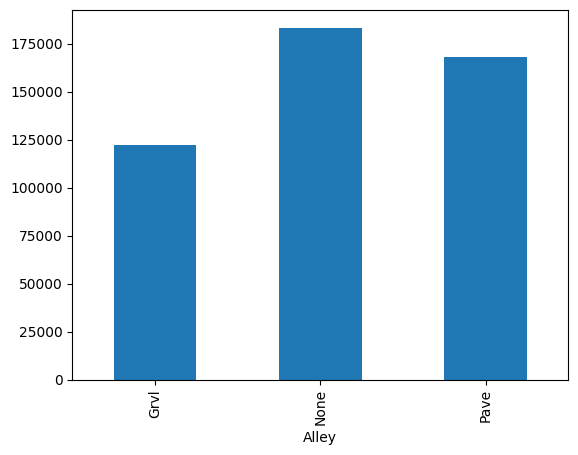

In [31]:
train.groupby('Alley')['SalePrice'].mean().plot(kind= 'bar');

In [32]:
train['Alley'].value_counts()

Alley
None    1369
Grvl      50
Pave      41
Name: count, dtype: int64

### Kolumna LotShape (Kształt działki)
- One Hot Encoder

In [33]:
train['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

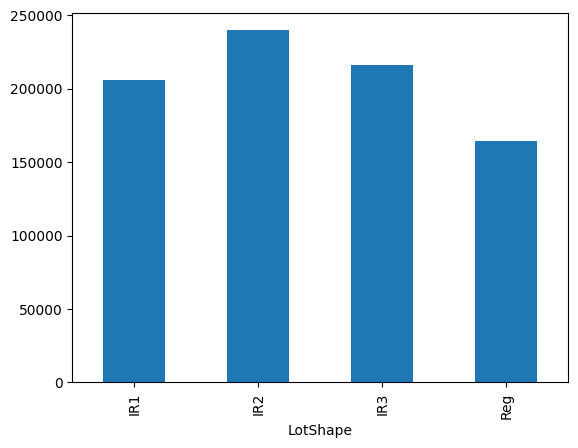

In [34]:
train.groupby('LotShape')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna LandContour (Rzeźba terenu)
- One Hot Encoder


    - Lvl (Level): Teren jest płaski lub o minimalnym nachyleniu
    - Bnk (Bank): Działka znajduje się na brzegu wzniesienia 
    - HLS (Hillside): Teren jest stromy lub pagórkowaty 
    - Low (Low-lying): Teren jest nisko położony

In [35]:
train['LandContour'].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

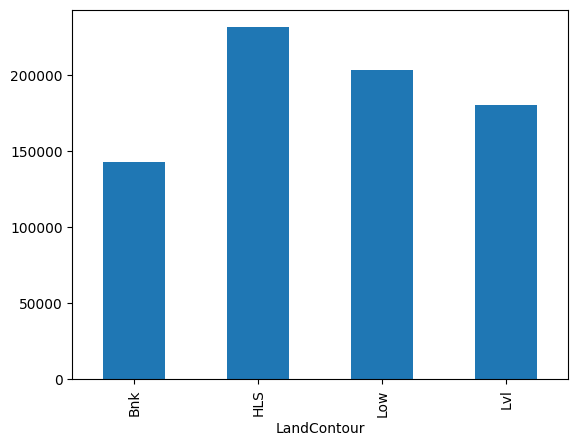

In [36]:
train.groupby('LandContour')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Utilities (Dostępność mediów)
- One Hot Encoder


In [37]:
train['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

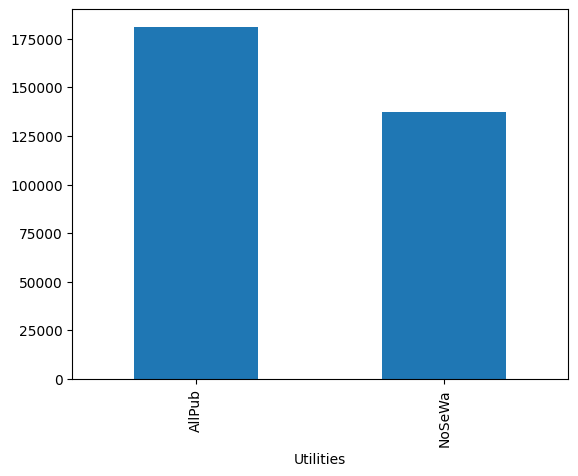

In [38]:
train.groupby('Utilities')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna LotConfig (Układ działki)
- One Hot Encoder

    - Inside: Działka znajduje się w środku rzędu działek
    - Corner: Działka narożna, znajduje się na skrzyżowaniu ulic
    - CulDSac: Działka na końcu ślepej uliczki (cul-de-sac)
    - FR2: Działka przylegająca do dwóch ulic z przodu i tyłu
    - FR3: Działka przylegająca do trzech lub więcej ulic

In [39]:
train['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

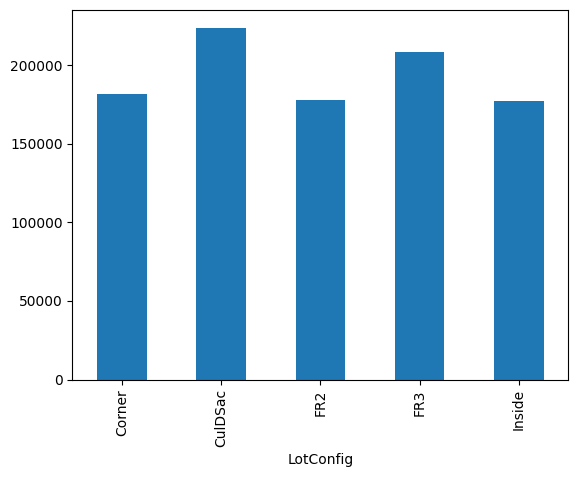

In [40]:
train.groupby('LotConfig')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna LandSlope (Nachylenie działki)
- One Hot Encoder

In [41]:
train['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

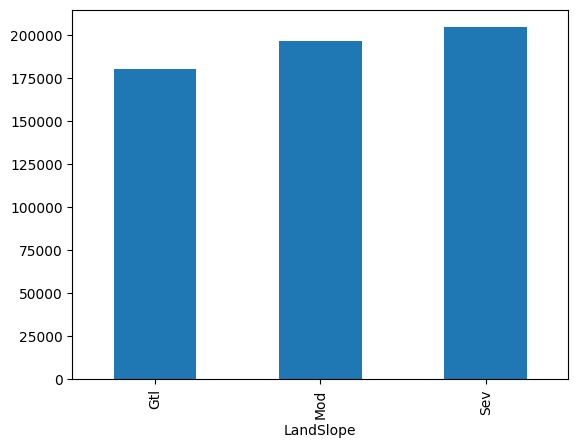

In [42]:
train.groupby('LandSlope')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Neighborhood (Nazwa dzielnicy)
- One Hot Encoder

In [43]:
train['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

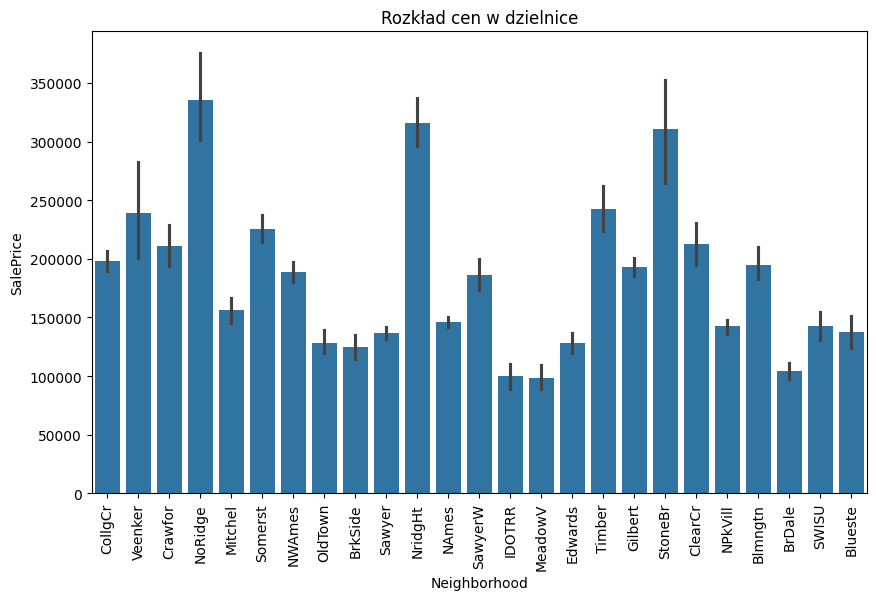

In [44]:
plt.figure(figsize= (10,6))
sns.barplot(x= train['Neighborhood'],y=train['SalePrice'])
plt.title('Rozkład cen w dzielnice')
plt.xticks(rotation=90)
plt.show()

### Kolumna Condition1 (Główne warunki otoczenia)
- One Hot Encoder

In [45]:
train['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

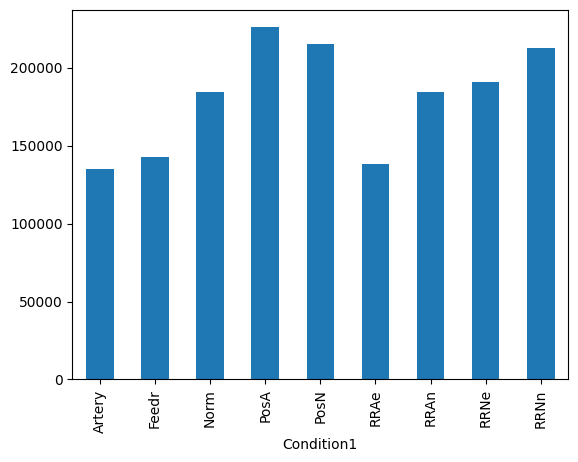

In [46]:
train.groupby('Condition1')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Condition2 (Dodatkowe warunki otoczenia
- One Hot Encoder

In [47]:
train['Condition2'].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

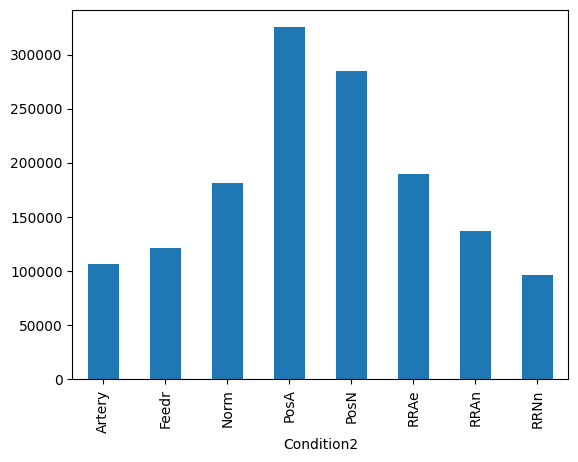

In [48]:
train.groupby('Condition2')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna BldgType (Typ budynku )
- One Hot Encoder

In [49]:
train['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

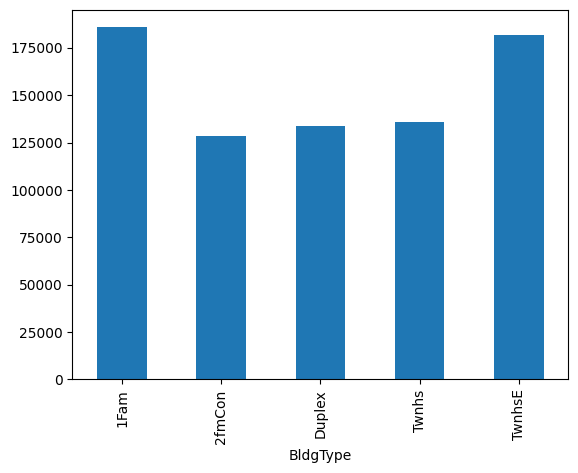

In [50]:
train.groupby('BldgType')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna HouseStyle (Styl budynku)
- One Hot Encoder

In [51]:
train['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

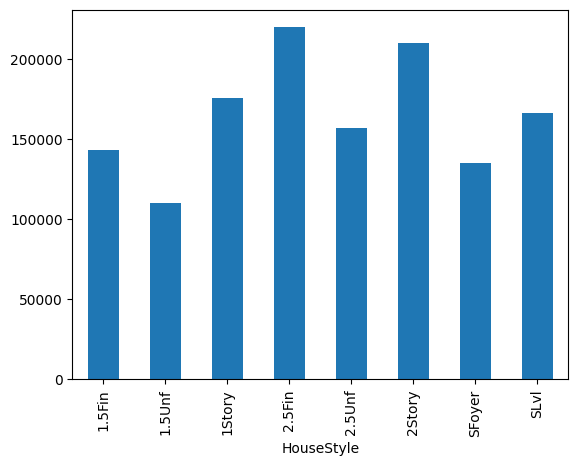

In [52]:
train.groupby('HouseStyle')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna OverallQual (Ogólna jakość budynku)
skala od 1 od 10


In [53]:
train['OverallQual'].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

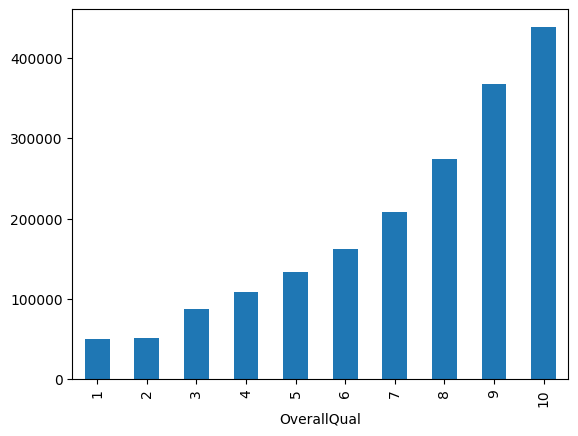

In [54]:
train.groupby('OverallQual')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna OverallCond (Ogólny stan budynku)

In [55]:
train['OverallCond'].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

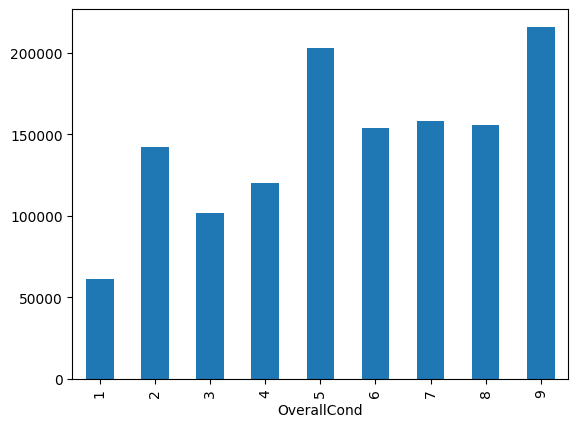

In [56]:
train.groupby('OverallCond')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna YearBuilt (Rok budowy budynku)

In [57]:
train['YearBuilt'].value_counts()

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64

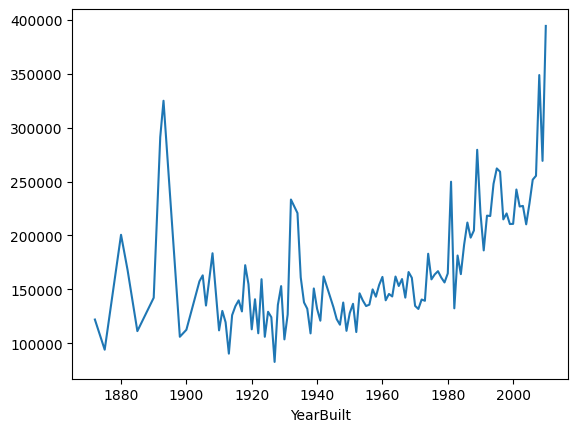

In [58]:
train.groupby('YearBuilt')['SalePrice'].mean().plot(kind= 'line');

### Kolumna YearRemodAdd (Rok ostatniej przebudowy)

In [59]:
train['YearRemodAdd'].value_counts()

YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: count, Length: 61, dtype: int64

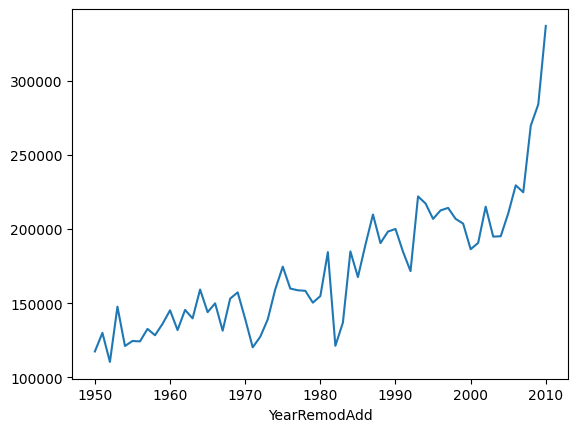

In [60]:
train.groupby('YearRemodAdd')['SalePrice'].mean().plot(kind= 'line');

### Kolumna RoofStyle (Styl dachu)
- One Hot Encoder

In [61]:
train['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

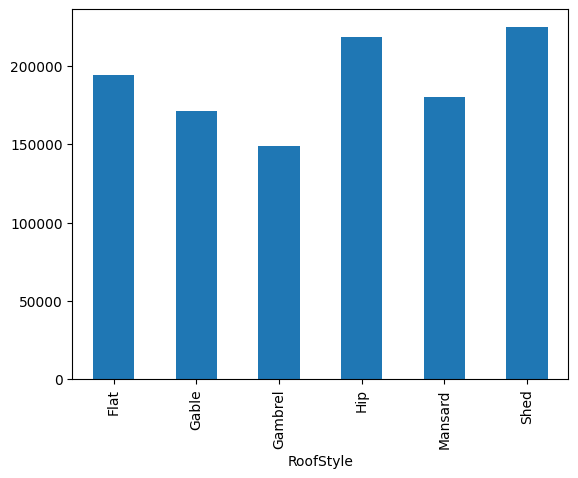

In [62]:
train.groupby('RoofStyle')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna RoofMatl (Materiał pokrycia dachowego)
- One Hot Encoder

In [63]:
train['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

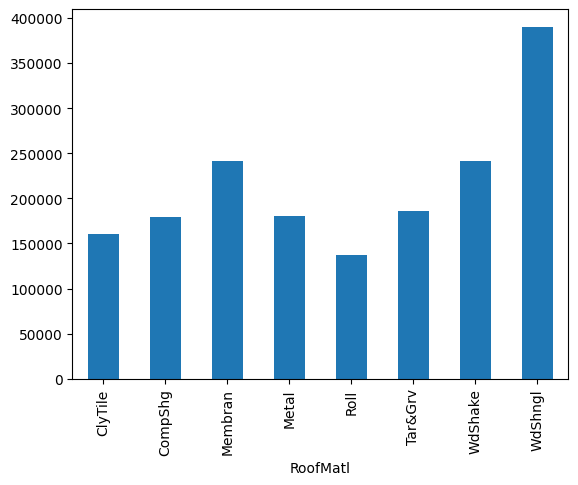

In [64]:
train.groupby('RoofMatl')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Exterior1st (Materiał zewnętrzny na pierwszym poziomie budynku)
- One Hot Encoder

In [65]:
train['Exterior1st'].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

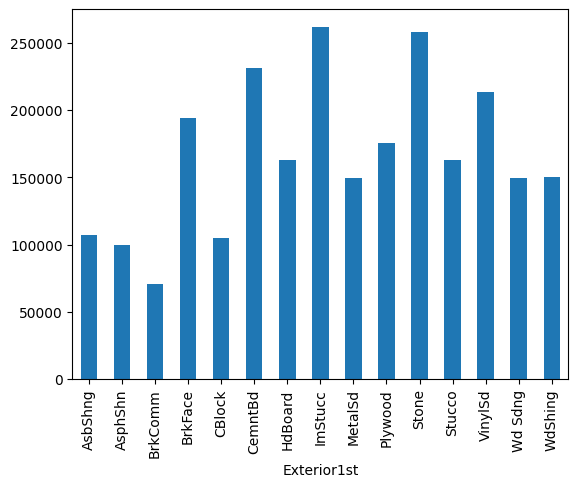

In [66]:
train.groupby('Exterior1st')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Exterior2nd (Materiał zewnętrzny na drugim poziomie budynku)
- One Hot Encoder

In [67]:
train['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

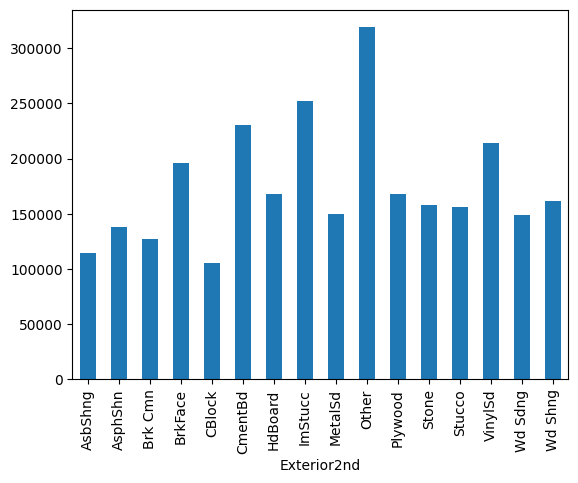

In [68]:
train.groupby('Exterior2nd')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna MasVnrType (Typ okładziny kamiennej)
- One Hot Encoder
- wypełnie puste wartosci None 

In [69]:
train['MasVnrType']= train['MasVnrType'].fillna('None')
test['MasVnrType']= test['MasVnrType'].fillna('None')

In [70]:
train['MasVnrType'].value_counts()

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

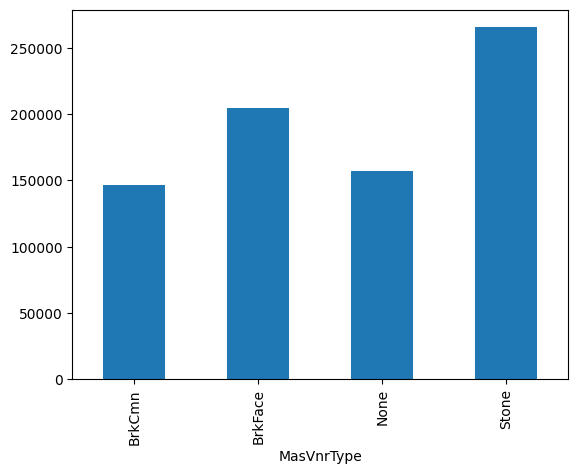

In [71]:
train.groupby('MasVnrType')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna MasVnrArea (owierzchnia okładziny kamiennej)
 Określa rodzaj wykończenia elewacji budynku przy użyciu kamienia lub cegły.

- One Hot Encoder
- puste wartosci wypełniam 0

In [72]:
train[(train['MasVnrType'] == 'None') & (train['MasVnrArea'].isna())][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


In [73]:
train[(train['MasVnrType'] == 'None') & (train['MasVnrArea'] != 0)][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
624,None,288.0
650,None,NaN
773,None,1.0
936,None,NaN
973,None,NaN
977,None,NaN
1230,None,1.0
1243,None,NaN


In [74]:
train['MasVnrArea']= train['MasVnrArea'].fillna(0)
test['MasVnrArea']= test['MasVnrArea'].fillna(0)

In [75]:
train['MasVnrArea'].isnull().sum()

0

W kolumnach 'MasVnrArea' i 'MasVnrType' jest niescisłosc poniewaz w kolumnie nie wpisano typu a powierzchnia jest wpisana

### Kolumna ExterQual (Jakość materiałów wykończeniowych na zewnątrz budynku)
- mapowanie wartosci na numeryczne

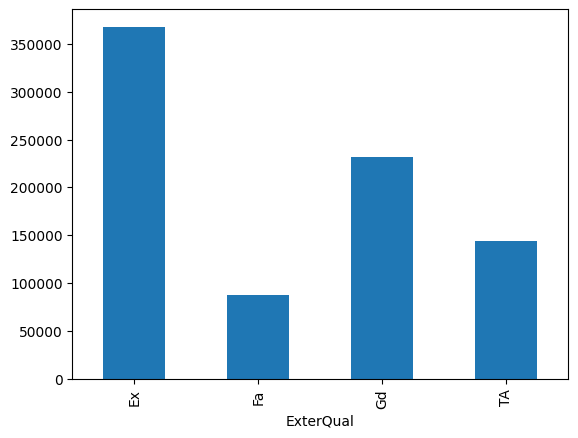

In [76]:
train.groupby('ExterQual')['SalePrice'].mean().plot(kind= 'bar');

In [77]:
train['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [78]:
ExterQual_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['ExterQual']= train['ExterQual'].map(ExterQual_mapping)
test['ExterQual']= test['ExterQual'].map(ExterQual_mapping)

### Kolumna ExterCond (Stan materiałów wykończeniowych na zewnątrz budynku.)
- mapowanie wartosci na numeryczne

In [79]:
train['ExterCond'].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

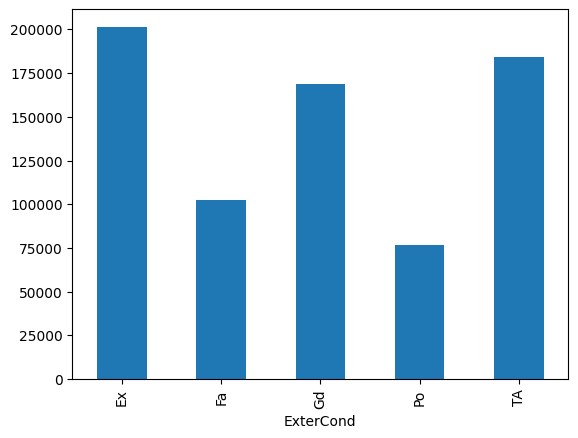

In [80]:
train.groupby('ExterCond')['SalePrice'].mean().plot(kind= 'bar');

In [81]:
ExterCond_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['ExterCond']= train['ExterCond'].map(ExterCond_mapping)
test['ExterCond']= test['ExterCond'].map(ExterCond_mapping)

In [82]:
train['ExterCond'].value_counts()

ExterCond
3    1282
4     146
2      28
5       3
1       1
Name: count, dtype: int64

### Kolumna Foundation (Typ fundamentów)
- One Hot Encoder

In [83]:
train['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

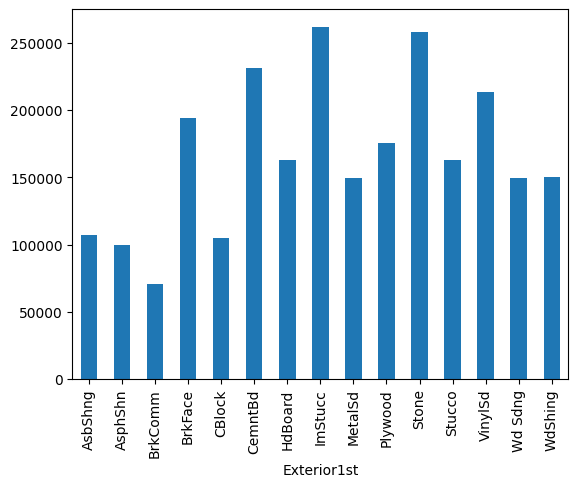

In [84]:
train.groupby('Exterior1st')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna BsmtQual (Jakość piwnicy)
- mapowanie wartosci na numeryczne
- wypełnienie wartościa None

In [85]:
train['BsmtQual'].isnull().sum()

37

In [86]:
train['BsmtQual']= train['BsmtQual'].fillna('None')
test['BsmtQual']= test['BsmtQual'].fillna('None')

In [87]:
train['BsmtQual'].value_counts()

BsmtQual
TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: count, dtype: int64

In [88]:
BsmtQual_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['BsmtQual']= train['BsmtQual'].map(BsmtQual_mapping)
test['BsmtQual']= test['BsmtQual'].map(BsmtQual_mapping)


In [89]:
train['BsmtQual'].value_counts()

BsmtQual
3    649
4    618
5    121
0     37
2     35
Name: count, dtype: int64

### Kolumna BsmtCond (Stan piwnicy)
- mapowanie wartosci na numeryczne
- wypełnienie wartościa None

In [90]:
train['BsmtCond']= train['BsmtCond'].fillna('None')
test['BsmtCond']= test['BsmtCond'].fillna('None')

In [91]:
train['BsmtCond'].value_counts()

BsmtCond
TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: count, dtype: int64

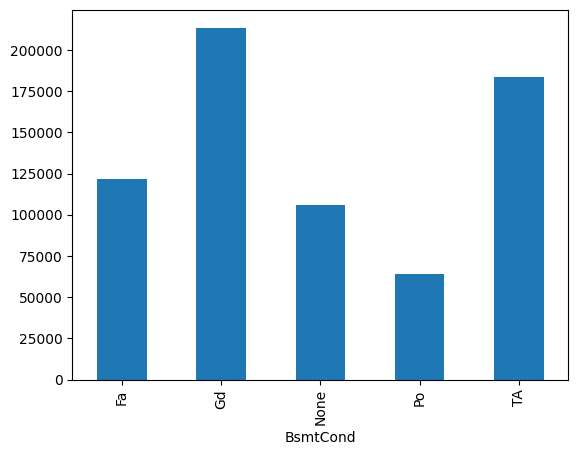

In [92]:
train.groupby('BsmtCond')['SalePrice'].mean().plot(kind= 'bar');

In [93]:
BsmtCond_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['BsmtCond']= train['BsmtCond'].map(BsmtCond_mapping)
test['BsmtCond']= test['BsmtCond'].map(BsmtCond_mapping)

In [94]:
train['BsmtCond'].value_counts()

BsmtCond
3    1311
4      65
2      45
0      37
1       2
Name: count, dtype: int64

### Kolumna BsmtExposure (Ekspozycja piwnicy)
- wypełnienie wartościa No
- mapowanie wartosci na numeryczne


In [95]:
train['BsmtExposure']= train['BsmtExposure'].fillna('No')
test['BsmtExposure']= test['BsmtExposure'].fillna('No')

In [96]:
train['BsmtExposure'].value_counts()

BsmtExposure
No    991
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

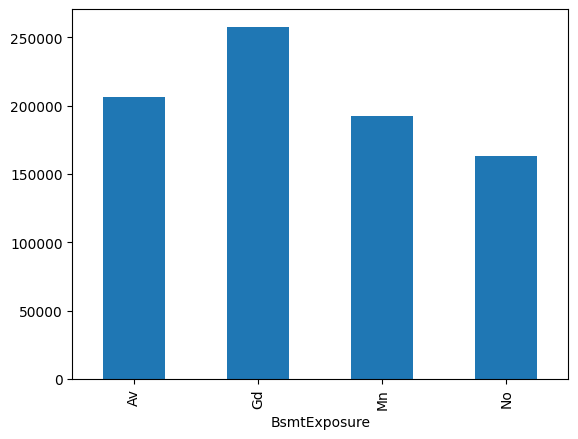

In [97]:
train.groupby('BsmtExposure')['SalePrice'].mean().plot(kind= 'bar');

In [98]:
BsmtExposure_mapping = {'Gd':3,'Av':2,'Mn':1,'No':0}

train['BsmtExposure']= train['BsmtExposure'].map(BsmtExposure_mapping)
test['BsmtExposure']= test['BsmtExposure'].map(BsmtExposure_mapping)

In [99]:
train['BsmtExposure'].value_counts()

BsmtExposure
0    991
2    221
3    134
1    114
Name: count, dtype: int64

### Kolumna BsmtFinType1 (Typ wykończenia piwnicy)
- wypełnienie wartościa None
- mapowanie wartosci na numeryczne


In [100]:
train['BsmtFinType1']= train['BsmtFinType1'].fillna('None')
test['BsmtFinType1']= test['BsmtFinType1'].fillna('None')

In [101]:
train['BsmtFinType1'].value_counts()

BsmtFinType1
Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: count, dtype: int64

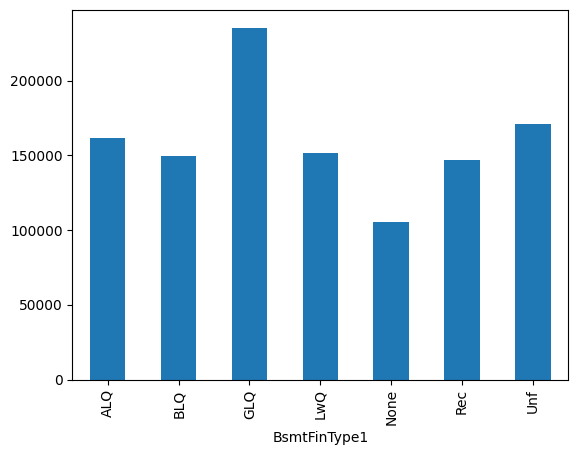

In [102]:
train.groupby('BsmtFinType1')['SalePrice'].mean().plot(kind= 'bar');

In [103]:
BsmtFinType1_mapping = {'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0,'None':-1}

train['BsmtFinType1']= train['BsmtFinType1'].map(BsmtFinType1_mapping)
test['BsmtFinType1']= test['BsmtFinType1'].map(BsmtFinType1_mapping)

In [104]:
train['BsmtFinType1'].value_counts()

BsmtFinType1
 0    430
 5    418
 4    220
 3    148
 2    133
 1     74
-1     37
Name: count, dtype: int64

### Kolumna BsmtFinSF1 (Powierzchnia wykończonej piwnicy)

In [105]:
train['BsmtFinSF1'].value_counts()

BsmtFinSF1
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: count, Length: 637, dtype: int64

### Kolumna BsmtFinType2 (Typ drugiego wykończenia piwnicy)
- wypełnienie wartościa None
- mapowanie wartosci na numeryczne

In [106]:
train['BsmtFinType2']= train['BsmtFinType2'].fillna('None')
test['BsmtFinType2']= test['BsmtFinType2'].fillna('None')

In [107]:
train['BsmtFinType2'].value_counts()

BsmtFinType2
Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: count, dtype: int64

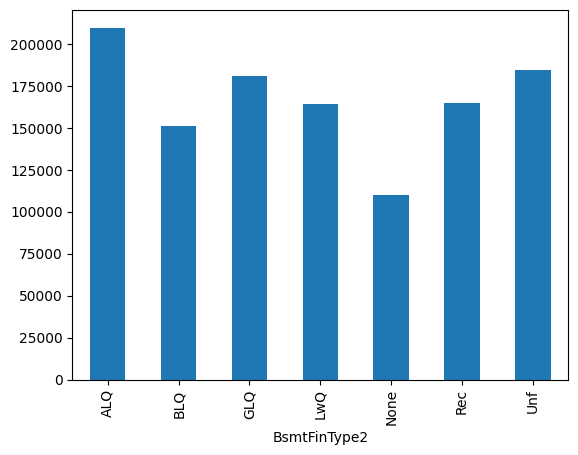

In [108]:
train.groupby('BsmtFinType2')['SalePrice'].mean().plot(kind= 'bar');

In [109]:
BsmtFinType2_mapping = {'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0,'None':-1}

train['BsmtFinType2']= train['BsmtFinType2'].map(BsmtFinType2_mapping)
test['BsmtFinType2']= test['BsmtFinType2'].map(BsmtFinType2_mapping)

### Kolumna BsmtFinSF2 (Powierzchnia drugiego wykończenia piwnicy)

In [110]:
train['BsmtFinSF2'].value_counts()

BsmtFinSF2
0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: count, Length: 144, dtype: int64

### Kolumna BsmtUnfSF (Powierzchnia niewykończonej piwnicy)

In [111]:
train['BsmtUnfSF'].value_counts()

BsmtUnfSF
0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: count, Length: 780, dtype: int64

### Kolumna TotalBsmtSF (Całkowita powierzchnia piwnicy)

In [112]:
train['TotalBsmtSF'].value_counts()

TotalBsmtSF
0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: count, Length: 721, dtype: int64

### Kolumna Heating (Rodzaj ogrzewania)
- One Hot Encoder

In [113]:
train['Heating'].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

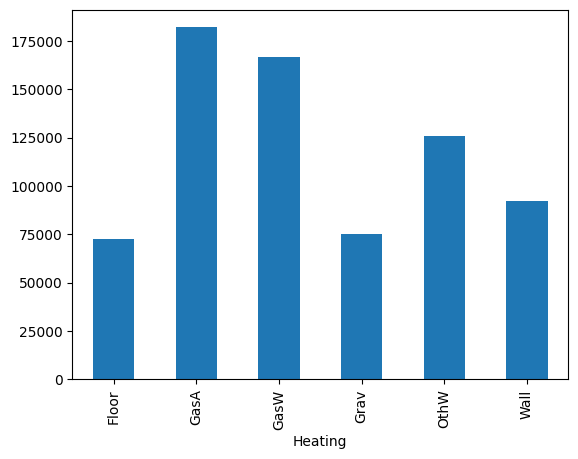

In [114]:
train.groupby('Heating')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna HeatingQC (Jakość systemu grzewczego)
- mapowanie wartosci na numeryczne

In [115]:
train['HeatingQC'].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

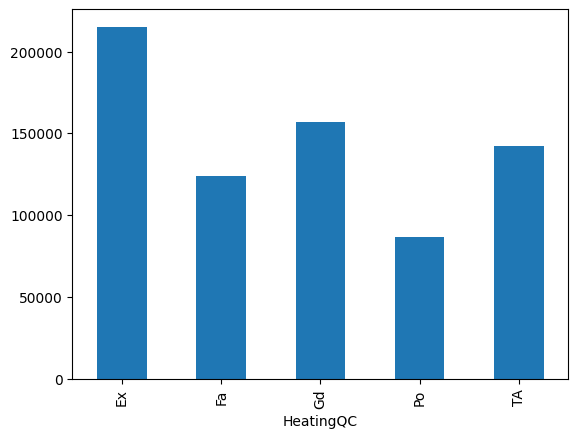

In [116]:
train.groupby('HeatingQC')['SalePrice'].mean().plot(kind= 'bar');

In [117]:
HeatingQC_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['HeatingQC']= train['HeatingQC'].map(HeatingQC_mapping)
test['HeatingQC']= test['HeatingQC'].map(HeatingQC_mapping)

### Kolumna CentralAir (Czy jest klimatyzacja centralna)
- mapowanie wartosci na numeryczne na 0 albo 1

In [118]:
train['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

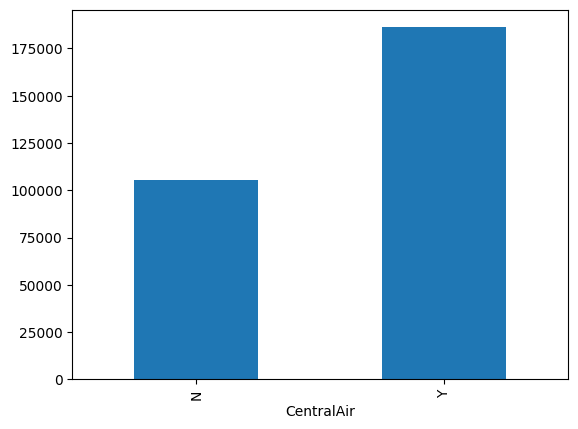

In [119]:
train.groupby('CentralAir')['SalePrice'].mean().plot(kind= 'bar');

In [120]:
CentralAir_mapping = {'Y':1,'N':0}

train['CentralAir']= train['CentralAir'].map(CentralAir_mapping)
test['CentralAir']= test['CentralAir'].map(CentralAir_mapping)

### Kolumna Electrical (Typ instalacji elektrycznej.)
- One Hot Encoder

In [121]:
train['Electrical'].isnull().sum()

1

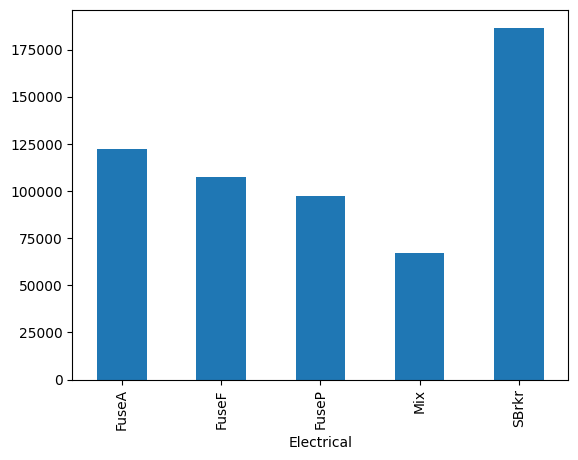

In [122]:
train.groupby('Electrical')['SalePrice'].mean().plot(kind= 'bar');

In [123]:
train['Electrical']= train['Electrical'].fillna('mode')
test['Electrical']= test['Electrical'].fillna('mode')

### Kolumna 1stFlrSF (Powierzchnia pierwszego piętra)

In [124]:
train['1stFlrSF'].value_counts()

1stFlrSF
864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: count, Length: 753, dtype: int64

### Kolumna 2ndFlrSF (Powierzchnia drugiego piętra)

In [125]:
train['2ndFlrSF'].value_counts()

2ndFlrSF
0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: count, Length: 417, dtype: int64

### Kolumna LowQualFinSF (Powierzchnia niskiej jakości wykończenia)

In [126]:
train['LowQualFinSF'].value_counts()

LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: count, dtype: int64

### Kolumna GrLivArea (Powierzchnia powierzchni mieszkalnej)

In [127]:
train['GrLivArea'].value_counts()

GrLivArea
864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: count, Length: 861, dtype: int64

### Kolumna BsmtFullBath (Liczba pełnych łazienek w piwnicy)

In [128]:
train['BsmtFullBath'].value_counts()

BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64

### Kolumna BsmtHalfBath (Liczba łazienek półpełnych w piwnicy)

In [129]:
train['BsmtHalfBath'].value_counts()

BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64

### Kolumna FullBath (Liczba pełnych łazienek w budynku)

In [130]:
train['FullBath'].value_counts()

FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

### Kolumna HalfBath (Liczba łazienek półpełnych w budynku)

In [131]:
train['HalfBath'].value_counts()

HalfBath
0    913
1    535
2     12
Name: count, dtype: int64

### Kolumna BedroomAbvGr (Liczba sypialni na piętrze)

In [132]:
train['BedroomAbvGr'].value_counts()

BedroomAbvGr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: count, dtype: int64

### Kolumna KitchenAbvGr (Liczba kuchni na piętrze)

In [133]:
train['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

### Kolumna KitchenQual (Jakość kuchni)

In [134]:
train['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

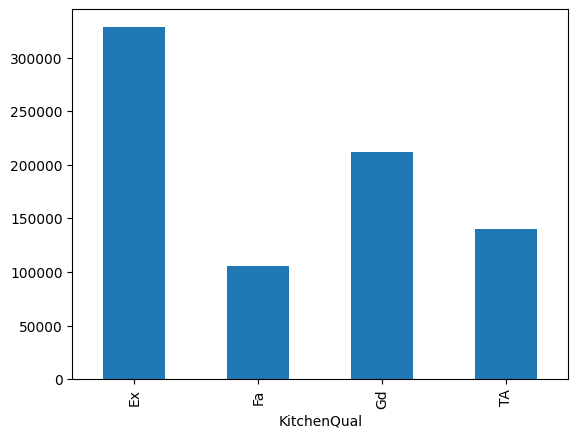

In [135]:
train.groupby('KitchenQual')['SalePrice'].mean().plot(kind= 'bar');

In [136]:
KitchenQual_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['KitchenQual']= train['KitchenQual'].map(KitchenQual_mapping)
test['KitchenQual']= test['KitchenQual'].map(KitchenQual_mapping)

### Kolumna TotRmsAbvGrd (Łączna liczba pokoi powyżej poziomu gruntu)

In [137]:
train['TotRmsAbvGrd'].value_counts()

TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64

### Kolumna Functional (Funkcjonalność budynku)
- One Hot Encoder

In [138]:
train['Functional'].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

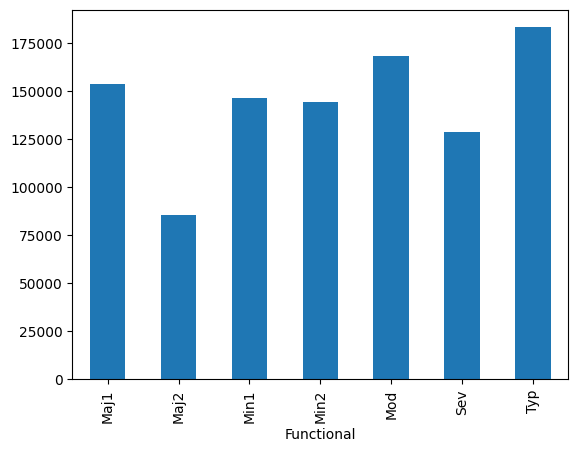

In [139]:
train.groupby('Functional')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Fireplaces (Liczba kominków w budynku)

In [140]:
train['Fireplaces'].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

### Kolumna FireplaceQu (Jakość kominka)


Do ocena jakosci kominka uzyto wartosci które bedze mozna 
- Ex: Doskonała.
- Gd: Dobra.
- TA: Średnia.
- Fa: Niska.
- Po: Bardzo niska.
- None: Brak kominka.

In [141]:
train['FireplaceQu']= train['FireplaceQu'].fillna('None')
test['FireplaceQu']= test['FireplaceQu'].fillna('None')

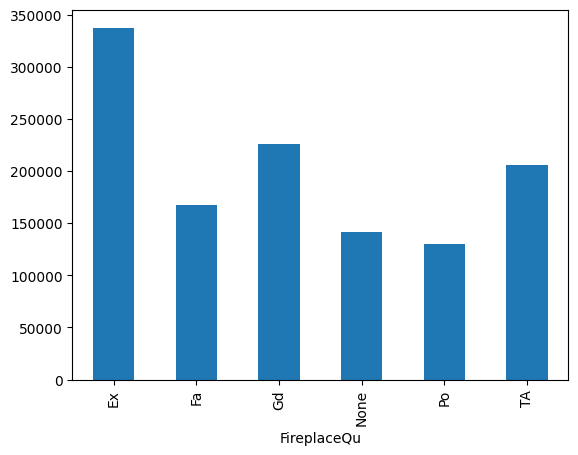

In [142]:
train.groupby('FireplaceQu')['SalePrice'].mean().plot(kind= 'bar');

In [143]:
fireplace_quality_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['FireplaceQu']= train['FireplaceQu'].map(fireplace_quality_mapping)
test['FireplaceQu']= test['FireplaceQu'].map(fireplace_quality_mapping)

In [144]:
train['FireplaceQu'].value_counts()

FireplaceQu
0    690
4    380
3    313
2     33
5     24
1     20
Name: count, dtype: int64

### Kolumna GarageType (Typ garażu)
- One Hot Encoder
- wypełnienie wartości None

In [145]:
train['GarageType']= train['GarageType'].fillna('None')
test['GarageType']= test['GarageType'].fillna('None')

In [146]:
train['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

### Kolumna GarageYrBlt (Rok budowy garażu)
- wypełnienie wartości 0

In [147]:
train['GarageYrBlt']= train['GarageYrBlt'].fillna(0)
test['GarageYrBlt']= test['GarageYrBlt'].fillna(0)

In [148]:
train['GarageYrBlt'].value_counts()

GarageYrBlt
0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 98, dtype: int64

### Kolumna GarageFinish (Wykończenie garażu)
- mapowanie wartosci na numeryczne
- wypełnienie wartości None

In [149]:
train['GarageFinish']= train['GarageFinish'].fillna('None')
test['GarageFinish']= test['GarageFinish'].fillna('None')


In [150]:
train['GarageFinish'].value_counts()

GarageFinish
Unf     605
RFn     422
Fin     352
None     81
Name: count, dtype: int64

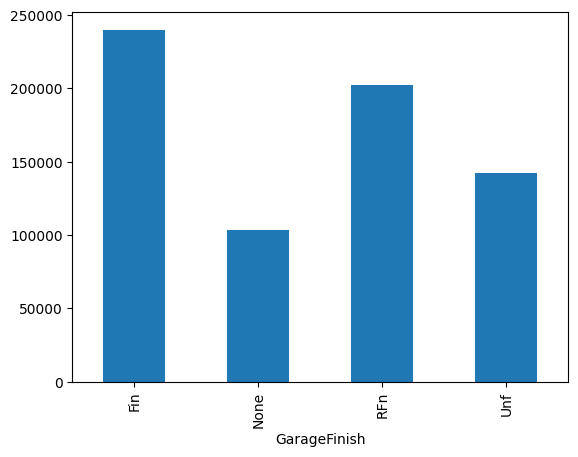

In [151]:
train.groupby('GarageFinish')['SalePrice'].mean().plot(kind= 'bar');

In [152]:
garage_finish_mapping= {'Fin':3,'RFn':2,'Unf':1,'None':0}

train['GarageFinish']= train['GarageFinish'].map(garage_finish_mapping)
test['GarageFinish']= test['GarageFinish'].map(garage_finish_mapping)

### Kolumna GarageCars (Liczba miejsc parkingowych w garażu)
- wypełnienie wartości 0
- One Hot Encoder

In [153]:
train['GarageCars']= train['GarageCars'].fillna(0)
test['GarageCars']= test['GarageCars'].fillna(0)

In [154]:
train['GarageCars'].value_counts()

GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64

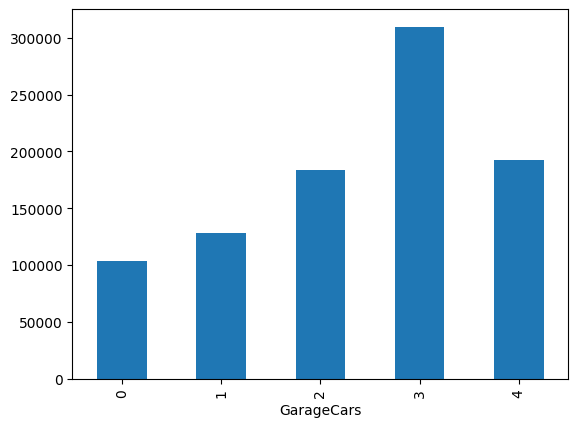

In [155]:
train.groupby('GarageCars')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna GarageArea (Powierzchnia garażu)
- wypełnienie wartości 0

In [156]:
train['GarageArea']= train['GarageArea'].fillna(0)
test['GarageArea']= test['GarageArea'].fillna(0)

In [157]:
train['GarageArea'].value_counts()

GarageArea
0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: count, Length: 441, dtype: int64

### Kolumna GarageQual (Jakość garażu)
- wypełnienie wartości None
- mapowanie wartosci na numeryczne

In [158]:
train['GarageQual']= train['GarageQual'].fillna('None')
test['GarageQual']= test['GarageQual'].fillna('None')

In [159]:
train['GarageQual'].value_counts()

GarageQual
TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: count, dtype: int64

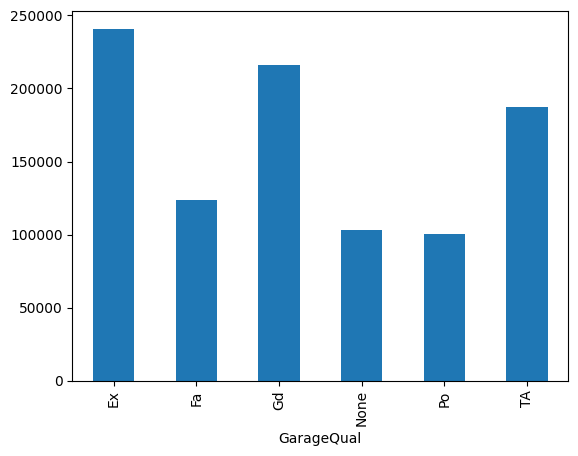

In [160]:
train.groupby('GarageQual')['SalePrice'].mean().plot(kind= 'bar');

In [161]:
garage_quality_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}

train['GarageQual']= train['GarageQual'].map(fireplace_quality_mapping)
test['GarageQual']= test['GarageQual'].map(fireplace_quality_mapping)

### Kolumna GarageCond (Stan garażu)
- wypełnienie wartości None
- mapowanie wartosci na numeryczne

In [162]:
train['GarageCond']= train['GarageCond'].fillna('None')
test['GarageCond']= test['GarageCond'].fillna('None')

In [163]:
train['GarageCond'].value_counts()

GarageCond
TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: count, dtype: int64

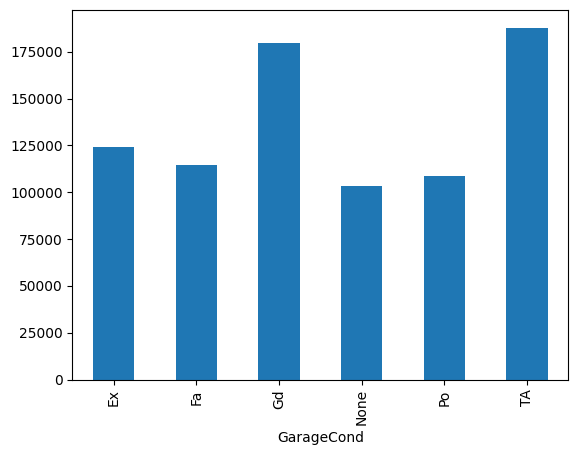

In [164]:
train.groupby('GarageCond')['SalePrice'].mean().plot(kind= 'bar');

In [165]:
garage_cond_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}

train['GarageCond']= train['GarageCond'].map(garage_cond_mapping)
test['GarageCond']= test['GarageCond'].map(garage_cond_mapping)

### Kolumna PavedDrive

In [166]:
train['PavedDrive'].value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

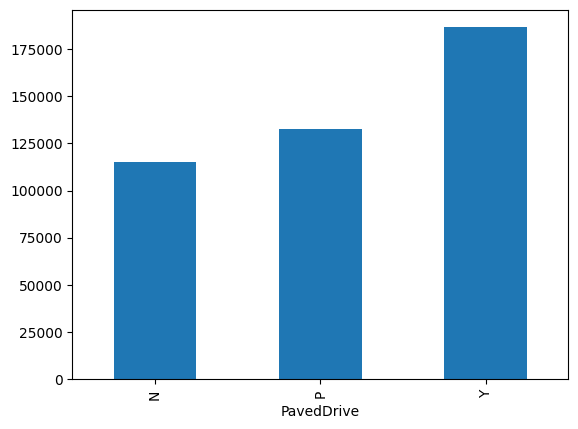

In [167]:
train.groupby('PavedDrive')['SalePrice'].mean().plot(kind= 'bar');

In [168]:
pavedDrive_mapping = {'P':0.5,'Y':1,'N':0}

train['PavedDrive']= train['PavedDrive'].map(pavedDrive_mapping)
test['PavedDrive']= test['PavedDrive'].map(pavedDrive_mapping)

### Kolumna WoodDeckSF (Powierzchnia drewnianego tarasu)

In [169]:
train['WoodDeckSF'].value_counts()

WoodDeckSF
0      761
192     38
100     36
144     33
120     31
      ... 
326      1
179      1
103      1
176      1
736      1
Name: count, Length: 274, dtype: int64

### Kolumna OpenPorchSF (Powierzchnia otwartego tarasu)

In [170]:
train['OpenPorchSF'].value_counts()

OpenPorchSF
0      656
36      29
48      22
20      21
40      19
      ... 
11       1
523      1
125      1
137      1
236      1
Name: count, Length: 202, dtype: int64

### Kolumna EnclosedPorch (Powierzchnia zamkniętego tarasu)

In [171]:
train['EnclosedPorch'].value_counts()

EnclosedPorch
0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: count, Length: 120, dtype: int64

### Kolumna 3SsnPorch (Powierzchnia tarasu na 3 sezony)

In [172]:
train['3SsnPorch'].value_counts()

3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64

### Kolumna ScreenPorch (Powierzchnia tarasu z ekranami)

In [173]:
train['ScreenPorch'].value_counts()

ScreenPorch
0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: count, Length: 76, dtype: int64

### Kolumna PoolArea (Powierzchnia basenu)

In [174]:
train['PoolArea'].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

### Kolumna PoolQC (Jakość basenu)
- wypełnienie wartości None
- mapowanie wartosci na numeryczne

odnosi sie do jakosci basenu w domach, jest tylko 7 watosci poniewaz w 7 domach sa tylko baseny. Oznacza to ze posiadanie basenów jest bardzo rzadkie i moze byc cechą charakterystyczna dla luksusowych nieruchomości. Warto bedzie przeprowadzic analize jak posiadanie basenu wpływa na cene

Zamierzam wypełnic puste wartosci a nastepnie zakodowac jako zmienna numeryczna aby uwzglednic ja w  modelu.
- Gd good
- Ex Excellent
- Fa fair

In [175]:
train['PoolQC']= train['PoolQC'].fillna('None')
test['PoolQC']= test['PoolQC'].fillna('None')

In [176]:
train['PoolQC'].value_counts()

PoolQC
None    1453
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64

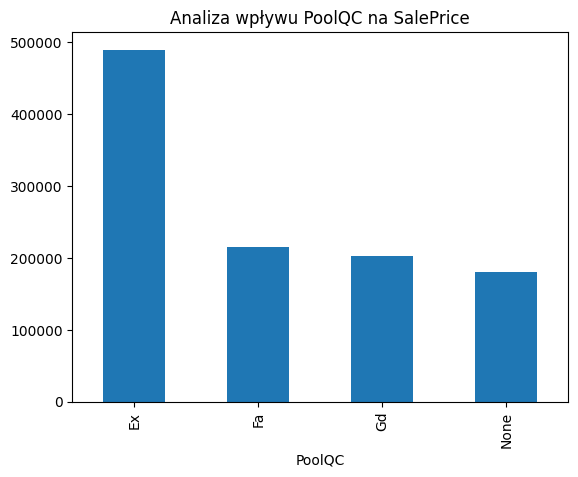

In [177]:
train.groupby('PoolQC')['SalePrice'].mean().plot(kind= 'bar')
plt.title('Analiza wpływu PoolQC na SalePrice')
plt.show()

In [178]:
PoolQC_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}

train['PoolQC']= train['PoolQC'].map(PoolQC_mapping)
test['PoolQC']= test['PoolQC'].map(PoolQC_mapping)

### Kolumna Fence (Obecność ogrodzenia)
- wypełnienie wartości None
- mapowanie wartosci na numeryczne



- GdPrv: Dobre prywatne.
- MnPrv: Średnie prywatne.
- GdWo: Dobre, ale bez prywatności.
- MnWw: Średnie, bez prywatności.
- None: Brak ogrodzenia.

In [179]:
train['Fence']= train['Fence'].fillna('None')
test['Fence']= test['Fence'].fillna('None')

In [180]:
train['Fence'].value_counts()

Fence
None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

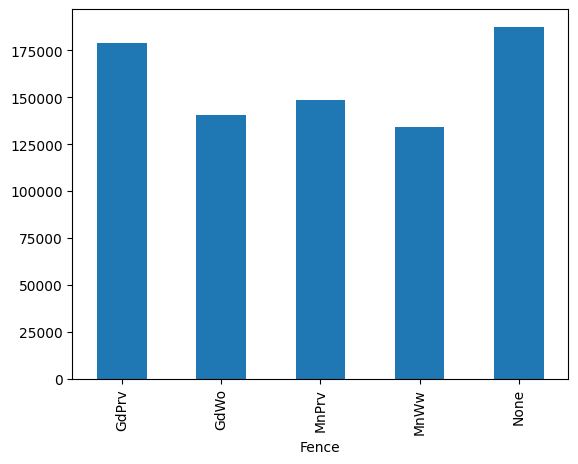

In [181]:
train.groupby('Fence')['SalePrice'].mean().plot(kind= 'bar');

In [182]:
fence_mapping = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0}

train['Fence']= train['Fence'].map(fence_mapping)
test['Fence']= test['Fence'].map(fence_mapping)

### Kolumna MiscFeature (Dodatkowe cechy )
- wypełnienie wartości None
- One Hot Encoder

Zawiera informacje o dodatkowych cechach nieruchomości kóre nie sa opisane w innych kolumnach, 

Zamierzam wypełnic braki i zakodowac kolumne na wartosci numeryczne

- Shed schowek,szopa
- Gar2 garage 2
- othr other
- TenC Tennis Court

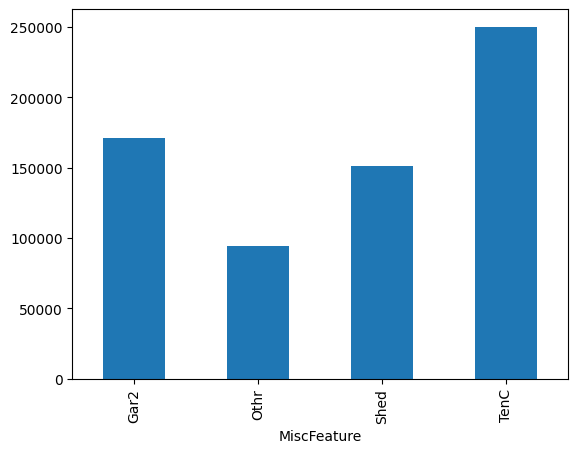

In [183]:
train.groupby('MiscFeature')['SalePrice'].mean().plot(kind= 'bar');

In [184]:
train['MiscFeature']= train['MiscFeature'].fillna('None')
test['MiscFeature']= test['MiscFeature'].fillna('None')

In [185]:
train['MiscFeature'].value_counts()

MiscFeature
None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

### Kolumna MiscVal (Wartość dodatkowych cech)

In [186]:
train['MiscVal'].value_counts()

MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64

### Kolumna MoSold (Miesiąc sprzedaży)

In [187]:
train['MoSold'].value_counts()

MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

### Kolumna YrSold (Rok sprzedaży)

In [188]:
train['YrSold'].value_counts()

YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64

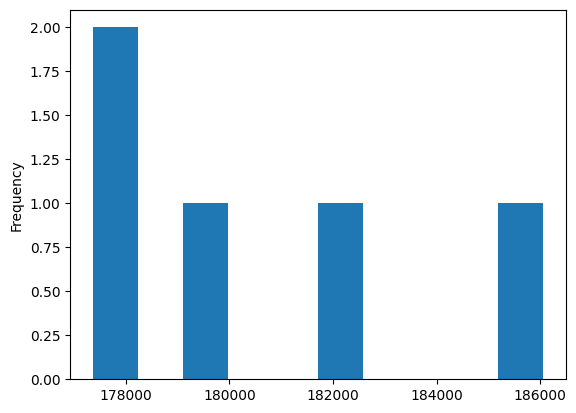

In [189]:
train.groupby('YrSold')['SalePrice'].mean().plot(kind= 'hist');

### Kolumna SaleType (Typ sprzedaży)
- One Hot Encoder

In [190]:
train['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

### Kolumna SaleCondition (Warunki sprzedaży)
- One Hot Encoder

In [191]:
train['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

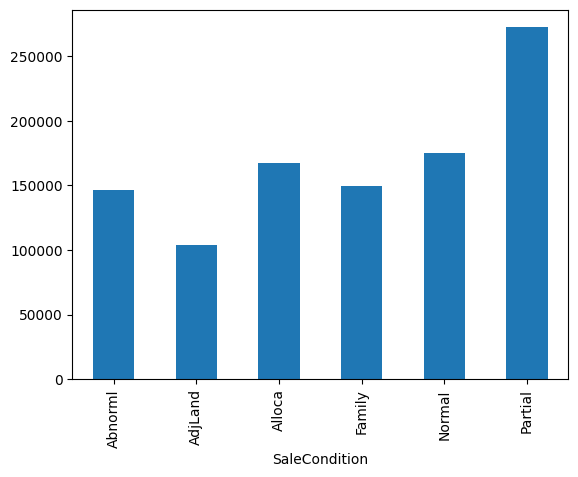

In [192]:
train.groupby('SaleCondition')['SalePrice'].mean().plot(kind= 'bar');

## Standaryzacja i One Hot Encoding

1. Dane numeryczne
    - Wykorzystałem StandardScaler, aby standadaryzowac dane numeryczne (średnia 0, odchylenie standardowe 1). Standaryzacja polega na odejmowaniu sredniej od orginalnej wartosci a nastepnie wynik jest dzielony przez odchylenie standardowe
2. Dane kategoryczne:
    - Wykorzystałem OneHotEncoder aby zakodowac zmienne kategorialne na postac liczbową. Przekształca każda kategorie z danej kolumny na unikalny wektor binarny (0,1). Wynikiem domyslnym jest macierz rzadka ( macierz która zawiera tylko 0 i 1)


In [193]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

attribs_one_hot = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
    'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Electrical',
    'MasVnrType','Foundation','Heating','Functional','GarageType','GarageCars','MiscFeature','SaleType','SaleCondition',]
attribs_num= ['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
    'ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinSF1','BsmtFinType1','BsmtFinType2',
    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
    'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',
    'Fireplaces','FireplaceQu','GarageYrBlt','GarageFinish','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF',
    'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscVal','MoSold','YrSold']


In [194]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()

train_scaled = scaler.fit_transform(train[attribs_num])
test_scaled =  scaler.transform(test[attribs_num])
train_scaled = pd.DataFrame(train_scaled, columns = attribs_num, index = train.index)
test_scaled = pd.DataFrame(test_scaled, columns= attribs_num, index=test.index)



encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

train_encoded = encoder.fit_transform(train[attribs_one_hot])
test_encoded = encoder.transform(test[attribs_one_hot])

#pobieranie nazw zakodowanyck kolumn
encoded_column = encoder.get_feature_names_out(attribs_one_hot)

# Zamiana na dataframe z odpowienimi nazwami kolumn
train_encoded = pd.DataFrame(train_encoded, columns= encoded_column, index= train.index)
test_encoded = pd.DataFrame(test_encoded, columns= encoded_column, index= test.index)


### Łącznie kolumn
pd.concat pozwala na łaczenie obiektów DataFrame wzdłuż określonej osi (axis = 1 pionowo)
odbywa sie to na poziomie indeksów,  kolumny z train_scaled i kolumny z train_encoded beda dołączone do siebie i zapisane w nowej zmiennej train_final

Jezeli kolumny sa róznej długosci wiersze bez odpowiednika beda wypełnione NaN

In [195]:
train_final = pd.concat([train_scaled,train_encoded],axis = 1)
test_final = pd.concat([test_scaled, test_encoded], axis=1)

print(train_final.shape)
print(test_final.shape)


(1460, 242)
(1459, 242)


# Walidacja danych i Trenowanie Modelu bazowego


Root Mean Squared Error (RMSE) czyli pierwiastek z błędu średniokwadratowego.

- RMSE jest miarą odległosci miedzy wartościami rzeczywistymi (y) a przewidywanymi (y_pred).
- Niższy wynik oznacza lepsze przewidywanie rzeczywiste wartości 
- RMSE opiera sie na błedzie kwadratowym, kładzie wiekszy nacisk na wieksze róznice medzy przewidywana a rzeczywistą warościa

W bibliotece scikit-learn nie jest dostepna metryka RMSE ale mozna go łatwo obliczyc za pomocą funkcji mean_squared_error z dodaniem pierwiastka

In [196]:
from sklearn.metrics import mean_squared_error, make_scorer

def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

### Wczytywanie danych

In [197]:
train_final.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=242)

In [198]:
X = train_final.drop(['Id'], axis =1)
y =train['LogSalePrice']

## Model Bazowy 

Model bazowy służy do stworzenia punktu odniesienia z bardziej złozonymi modelami.
DummyRegressor ignoruje dane wejsciowe i dokonuje przewidywan na podstwie prostej reguły. W tym przypadku przewiduje on srednia wartość zmiennej docelowej w danych treningowych (średnia lub mediane)

In [199]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size= 0.2, random_state=42)

- za pomoca funkcji train_test_split przed rozdzieleniem podzbiorów przeprowadza wewnętrzene tasowanie zestawów danych uczących
- Dzieki parametrowi random_state okreslilismy ziarno losowości dla wewnetrznego generatora liczb pseudolosowych który słuzy do tasowania zestawów danych przed ich rozdzieleniem. Wprowadzenie ziarna o ustalonej wartości pozwala na zachowac odtwarzalnosc doswiadczen

In [201]:
model = DummyRegressor()
model.fit(X_train, y_train)

y_pred_log = model.predict(X_val)

y_val_real = np.exp(y_val)
y_pred_real = np.exp(y_pred_log)

rmse_log= root_mean_squared_error(y_val, y_pred_log )
print(f"RMSE w logarytmicznej skali: {rmse_log}")

rmse_real= root_mean_squared_error(y_val_real, y_pred_real )
print(f"RMSE w oryginalnej skali: {rmse_real}")



RMSE w logarytmicznej skali: 0.43324391618066094
RMSE w oryginalnej skali: 88270.85365477801


Model oblicza srednią wartość zeminnej y_train (zlogarytmowanych wartości SalePrice) i zapamietuje ja jako regułe do przewidywań.
DummyRegressor ignoruje cechy X_train, nie bierze pod uwage żadnych zależności miedzy X_traina y_train.

Model nastepnie generuje przewidywania dla danych walidacyjnych (X_val). W tym przypadku kazde przewidywanie bedzie równe sredniej wartosci y_train obliczonej podczas trenowania modelu 

Odwrotnie  logarytmuje rzeczywiste wartosci zmiennej docelowej (y_val) z logarytmowanej skali do orginalnej wartosci 
odwrotnie logarytmuje przewidywane watorsci (y_pred_log) z logatytmowanej skali do orginalnej 

RMSE mierzy srednia odległosc miedzy rzeczywistymi wartosciami (y_val) a przewidywanymi wartosciami (y_pred_log)
Orginalna skala jest bardziej intuicyjna poniewaz wynik podowany jest w tej samej jednostce co dane 


#### Interpretacja wyniku
Srednia cena budynku wynosi około 180 921 dolarów
Przecietny błąd modelu wynosi około 88 270 dolarów 

Bład względny(Realtive RMSE) = RMSE/ Srednia cena  = 88 270 / 180 921 = 0.487

Oznacza to ze model przewiduje ceny z błedem wynoszącym około 49%, zatem sprawnosc modelu wynosi 51%

## Budowa Modelu

### Walidacja KFold 

In [201]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold


def fitting_model(model, X, y, folds = 6 ):
    
    kf = KFold(n_splits=folds, shuffle= True, random_state = 42)
    
    metric_rmse=[]
    for train_idx, test_idx in kf.split(X,y):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]
    
        model.fit(X_train,y_train)
        y_pred_log = model.predict(X_val)
        
        # Przekształcenie do oryginalnej skali
        y_val_real = np.exp(y_val)
        y_pred_real = np.exp(y_pred_log)
        
        score =  root_mean_squared_error(y_val_real, y_pred_real )
        metric_rmse.append(score)
        
    baseline = 180921 #Srednia wartosc domów
    avg_rmse = sum(metric_rmse)/len(metric_rmse)
    capability = round(100-((avg_rmse/baseline)*100), 2)
    return (f"RMSE w oryginalnej skali: {avg_rmse}, sprawnosc modelu {capability} %")
    


Podział zbioru treningowe został podzielony na n róznych czesci(foldów). Podczas każdego obiegu jeden fold staje sie zbiorem walidacyjnym a pozostałem n foldów stanowi zbiór treningowy.

W pętli for iterujemy przez kazdy podział generujac indeksy liczbowe wierszy dla zbioru treningowego i walidacyjnego wybierajac odpowiednie wiersze na ich podstawie 

Zastosowany model bedzie przetrenowany poprzez podstawienie modelu do agrumentów funkcji 

### Wyres krzywej uczenia sie 

In [202]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer


def plot_learning_curve(model, X, y, cv= 7):
    
    # Przekształcenie y do skali oryginalnej
    y_exp = np.exp(y)
    
    # Obliczanie krzywej uczenia
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y_exp, cv=cv, scoring=rmse_scorer, train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=1
    )

     # Przekształcenie y do skali oryginalnej, jeśli dane były logarytmowane
    if np.any(y < 0):
        raise ValueError("Dane celu (y) nie mogą być ujemne przy użyciu funkcji exp. Sprawdź swoje dane.")
    y_exp = np.exp(y) if np.all(y >= 0) else y  # Tylko jeśli dane są logarytmowane
    
    # Obliczanie średniej i odchylenia standardowego dla zbiorów treningowych i walidacyjnych
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Wizualizacja krzywej uczenia
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Błąd treningowy", marker='o',color="r")
    plt.plot(train_sizes, val_mean, label="Błąd walidacyjny", marker='o',color="g")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1,color="g")
    
    plt.xlabel("Liczba próbek treningowych")
    plt.ylabel("RMSE (niższy lepszy)")
    plt.title("Krzywa uczenia się")
    plt.legend()
    plt.grid()
    plt.show()

## Zastosowanie modeli 

#### DecisionTreeRegressor

RMSE w oryginalnej skali: 50512.5033999809, sprawnosc modelu 72.08 %


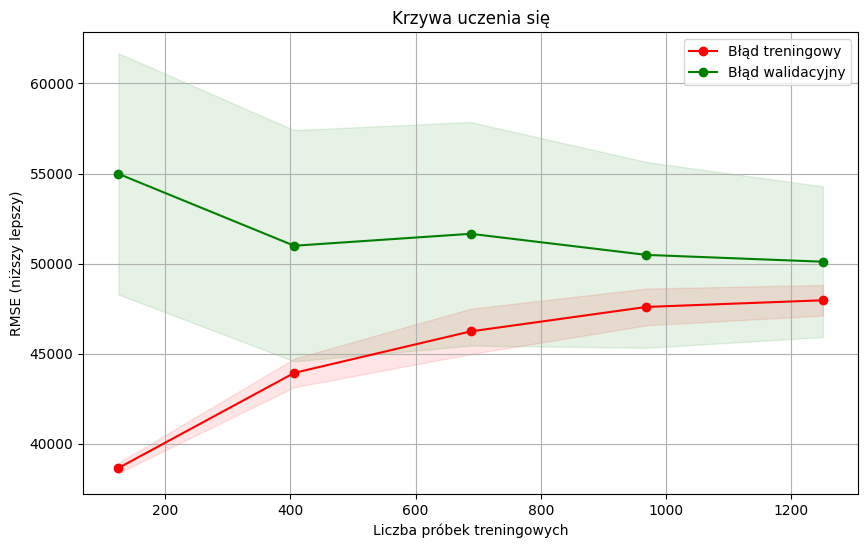

In [204]:
model_tree = DecisionTreeRegressor(random_state=42, max_depth=2)
print(fitting_model(model_tree,X,y,folds=7))
plot_learning_curve(model_tree, X, y, cv=7)

- Błąd treningowy przy małej liczbie danych treningowych jest niski ale wraz ze wzrostem liczby próbek bład treningowy rośnie, na koncu sie stabilizuje 
- Błąd walidacyjny na poczatku jest duży poniewaz model nie wystarczajaco dobrze generalizuje lecz wraz ze wzrostem próbek bład spada co wskazuje na poprawe zdolności generalizacji, jednak na koncu sie stabilizuje
- na koczu wykresu widac ze błąd walidacyjny jest wyraznie wyższy niz bład treningowy wskazuje to na niedopasowanie modelu, możliwe ze model jest zbyt prosty aby uchwycic złozone wzorce w danych 

RMSE w oryginalnej skali: 41790.280663143334, sprawnosc modelu 76.9 %


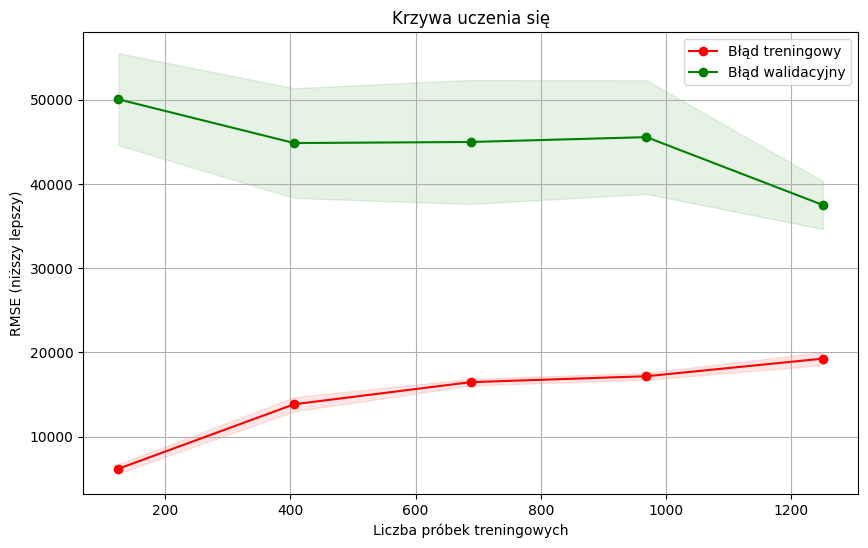

In [205]:
model_tree = DecisionTreeRegressor(random_state=42, max_depth=7)
print(fitting_model(model_tree,X,y,folds=7))
plot_learning_curve(model_tree, X, y, cv=7)

Po zmiekszeniu głebokości
-  Błąd walidacyjny uległ wyraznej poprawie co pozwoliłi modelowi uchwycic bardziej zożone zależności w danych
-  Błąd treningowy zmniejszył sie co oznacza model lepiej radzi sobie z dopasowaniem danych treningowych

Zwiekszenie głebokości drzewa spowodowało ze model jest bardziej dopasowany do danych a róznica miedzy błedami treningowymi i walidacyjnymi wkazuje na przeuczenie 

#### RandomForestRegressor

- max_depth parametr ten decyduje o złozonosci modelu i liczbie interrakcji miedzy cechami które model jest w stanie uchwycic
- n_estimators prarmetr ten kontroluje liczbe drzew w lesie 

RMSE w oryginalnej skali: 47571.42833012861, sprawnosc modelu 73.71 %


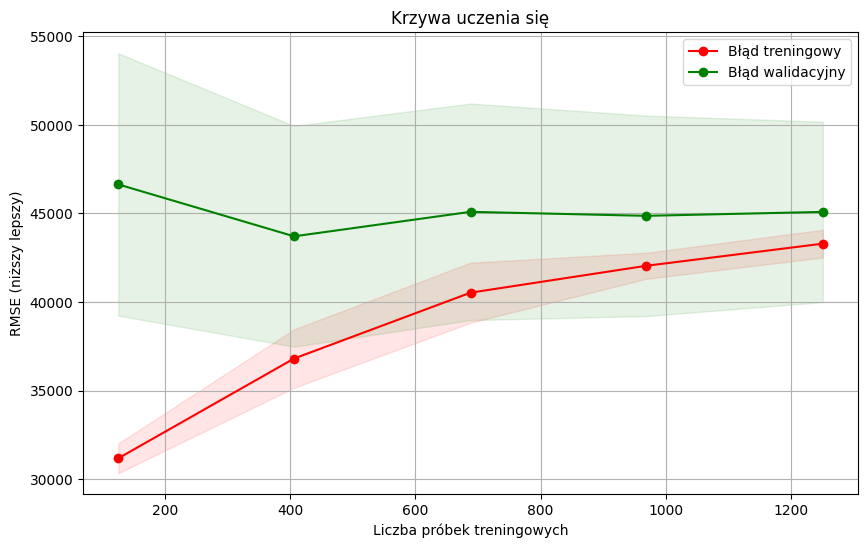

In [206]:
model_forest = RandomForestRegressor(max_depth=2, n_estimators=20)
print(fitting_model(model_forest,X,y,folds=7))
plot_learning_curve(model_forest, X, y, cv=7)


- Błąd walidacyjny: Wraz ze wzrostem liczby danych błąd walidacyjny nie poprawia się, a w końcowej fazie pogarsza się.
- rozrzut błedu walidacyjnego sugeruje ze model jes niestabilny
- Bład treningowy jest stosunkowy wysoki moze wskazywac ze model nie jest wystarczajaco złożony

Model jest niedouczony 

RMSE w oryginalnej skali: 34076.161620232786, sprawnosc modelu 81.17 %


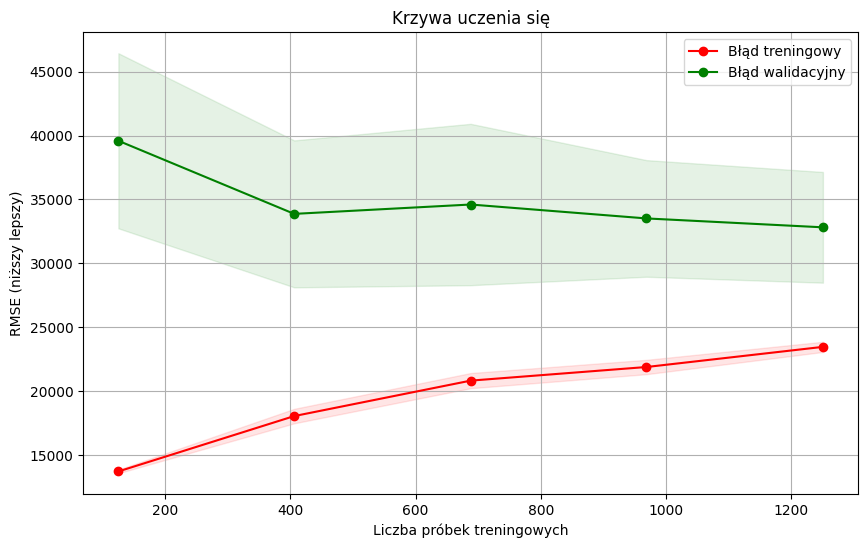

In [207]:
model_forest = RandomForestRegressor(max_depth=5, n_estimators=1000)
print(fitting_model(model_forest,X,y,folds=7))
plot_learning_curve(model_forest, X, y, cv=7)


- Linia błedu walidacyjnego stabilizuje sie wraz ze wzrostem liczby danych co oznacza ze model wraz ze zwiekszeniem danych dobrze generalizuje
- Rozrzut wyników walidacji jest jest mniejszy co swiadczu o wiekszej stabilnosci modelu 
- Zmniejszenie błedu treningowego wskazuje ze model dobrze odszukuje wzorce w danych


#### ExtraTreesRegressor

RMSE w oryginalnej skali: 32430.148593635535, sprawnosc modelu 82.07 %


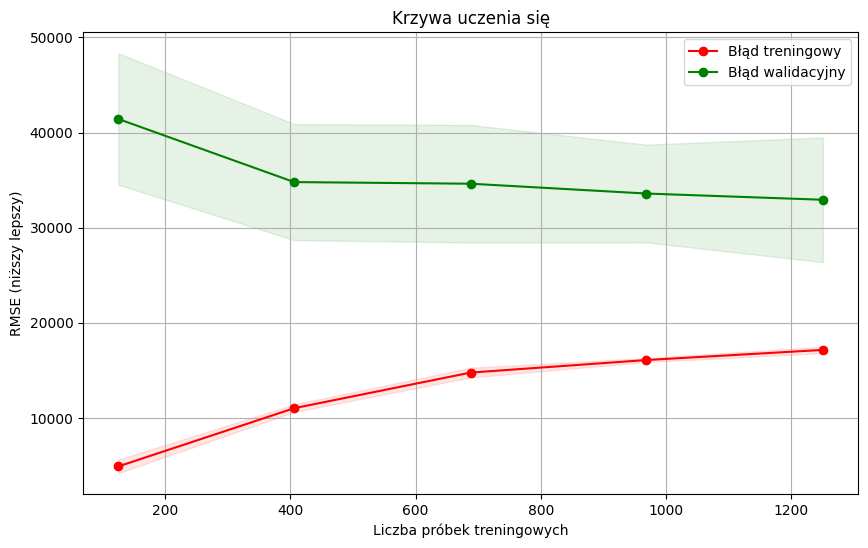

In [208]:
model_ext_tree = ExtraTreesRegressor(max_depth=7, n_estimators=20)
print(fitting_model(model_ext_tree,X,y,folds=7))
plot_learning_curve(model_ext_tree, X, y, cv=7)




- Bład treningowy wzrasta wraz ze wzrostem liczby danych wzrasta ale nie zacząco
- Błąd walidacyjny znaczaco maleje wraz ze wzrostem liczby danych na konsu sie stabilizuje, rozrzut pozostaje taki sam co oznacza niestabilnosc modelu bez wzgledu na ilosc próbek
- rozbieżnośc miedzy błedem treningowym a walidacyjnym wskazuje na przeuczenie modelu

RMSE w oryginalnej skali: 32170.72055449661, sprawnosc modelu 82.22 %


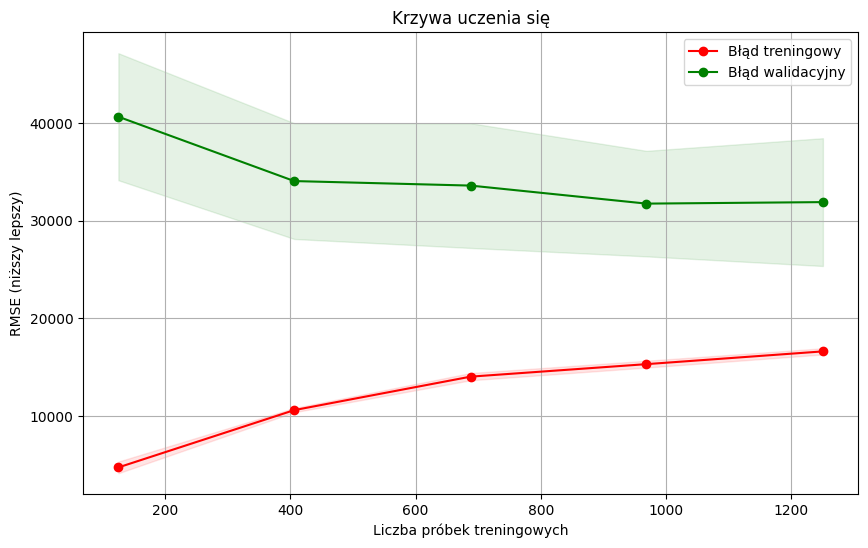

In [209]:
model_ext_tree = ExtraTreesRegressor(max_depth=7, n_estimators=1000)
print(fitting_model(model_ext_tree,X,y,folds=7))
plot_learning_curve(model_ext_tree, X, y, cv=7)

- Błąd walidacyjny modelu stabilizuje się we wczesnym poziomie nauki modelu, co wskazuje, że model nie poprawia swojej zdolności do generalizacji wraz ze wzrostem liczby danych. Mozliwe ze model osiągną juz swój maksymalny potencjał w odniesieniu do obecnych danych
- Duży rozrzut błędu walidacyjnego sugeruje, że model jest niestabilny i posiada różne wyniki."
- Różnica pomiędzy błędem treningowym a walidacyjnym jest oznaką przeuczenia, ponieważ model dobrze dopasowuje się do danych treningowych, ale nie potrafi uchwycić wzorców w danych walidacyjnych

Wydaje mi sie ze model osiągnął maksymalny poziom wyjdanosci 

#### GradientBoostingRegressor

RMSE w oryginalnej skali: 28177.859290311022, sprawnosc modelu 84.43 %


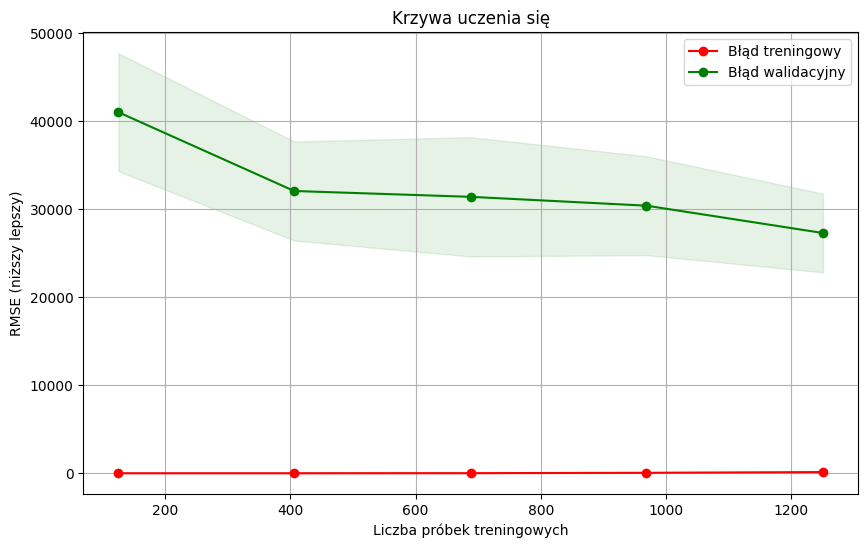

In [210]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(max_depth=5, n_estimators=1000, random_state=42)
print(fitting_model(model_gbr,X,y,folds=7))
plot_learning_curve(model_gbr, X, y, cv=7)

#### XGBRegressor

In [211]:
model_xgb = XGBRegressor(max_depth=10, n_estimators=1000, random_state=42)
print(fitting_model(model_xgb,X,y,folds=7))


RMSE w oryginalnej skali: 32786.07489420789, sprawnosc modelu 81.88 %


## Feature Engineering:


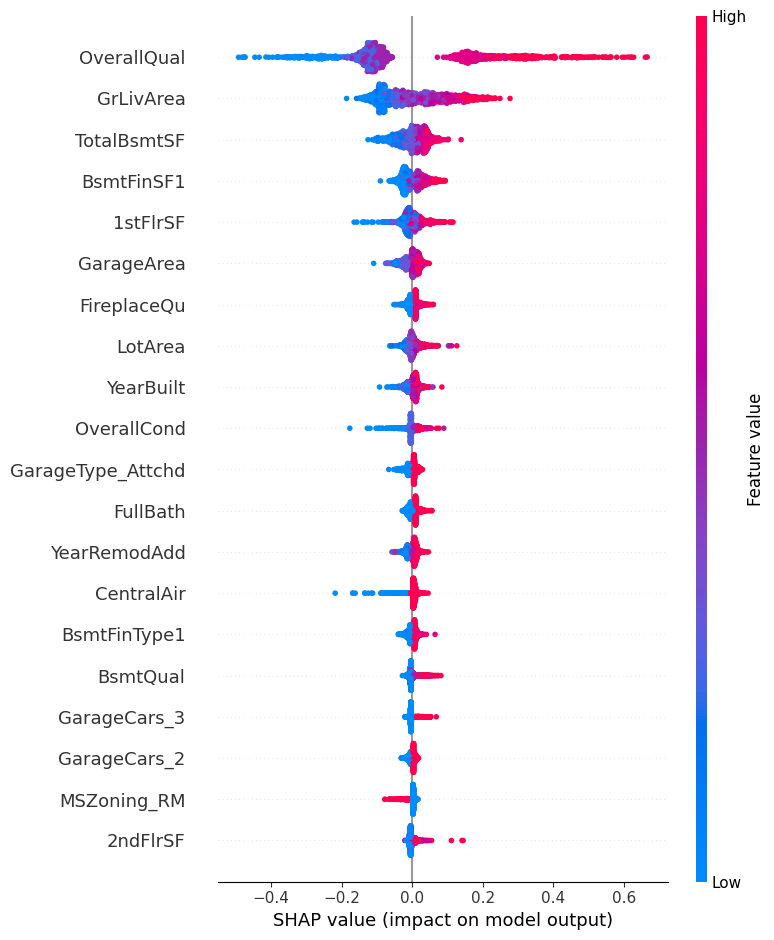

In [212]:
import shap

# Obiekt SHAP
explainer = shap.Explainer(model_xgb)
shap_values = explainer.shap_values(X)

# Wykres ważności cech1
shap.summary_plot(shap_values, X)

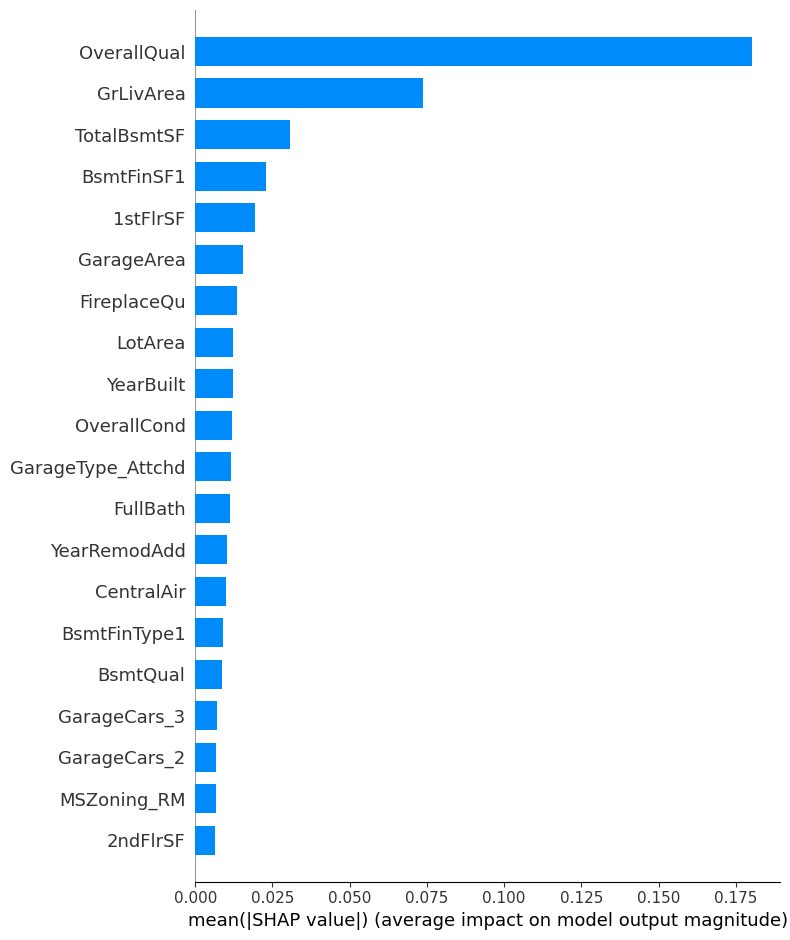

In [213]:
shap.summary_plot(shap_values,X,plot_type="bar")

## Hiperparametryzacja

### DecisionTreeRegressor

In [ ]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV


param_tree_rand = {
    'max_depth': randint(3, 20),                # Maksymalna głębokość drzewa
    'min_samples_split': randint(2, 20),       # Minimalna liczba próbek do podziału węzła
    'min_samples_leaf': randint(1, 10),        # Minimalna liczba próbek w liściu
    'max_leaf_nodes': randint(10, 100),        # Maksymalna liczba liści
    'min_impurity_decrease': uniform(0.0, 0.1) # Minimalna redukcja zanieczyszczenia
}

model_tree_rand = DecisionTreeRegressor(random_state=42)
skf = KFold(n_splits=7, shuffle= True, random_state = 42)

random_search_tree_rand = RandomizedSearchCV(
    estimator=model_tree_rand, #model który bedzie optymalizowany 
    param_distributions=param_tree_rand, #przestrzen hiperparametrów do przeszukania 
    n_iter=1000, #liczba losowy kombinacji parametrów do przetestowania 
    scoring=rmse_scorer, # kryterium oceny modelu
    random_state=42, # ziarno dla powtarzalnych wyników
    n_jobs=-1, # pozwala na uzycie wszystkich dostepnych procesów do równoległego przetwarzania
    cv = skf # walidacja stratyfikowana 
)

random_search_tree_rand.fit(X_train, y_train)

best_params_tree_rand = random_search_tree_rand.best_params_
best_score_tree_rand = random_search_tree_rand.best_score_
print("Najlepsze parametry:", best_params_tree_rand)

#Robie wykres uczenia sie najlepszego modelu jaki został wytrenowany
plot_learning_curve(random_search_tree_rand.best_estimator_, X, y, cv=skf)

### ExtraTreesRegressor

Najlepsze parametry: {'bootstrap': True, 'max_depth': 9, 'max_leaf_nodes': 78, 'min_impurity_decrease': 0.00015651051914729043, 'min_samples_leaf': 7, 'min_samples_split': 14}


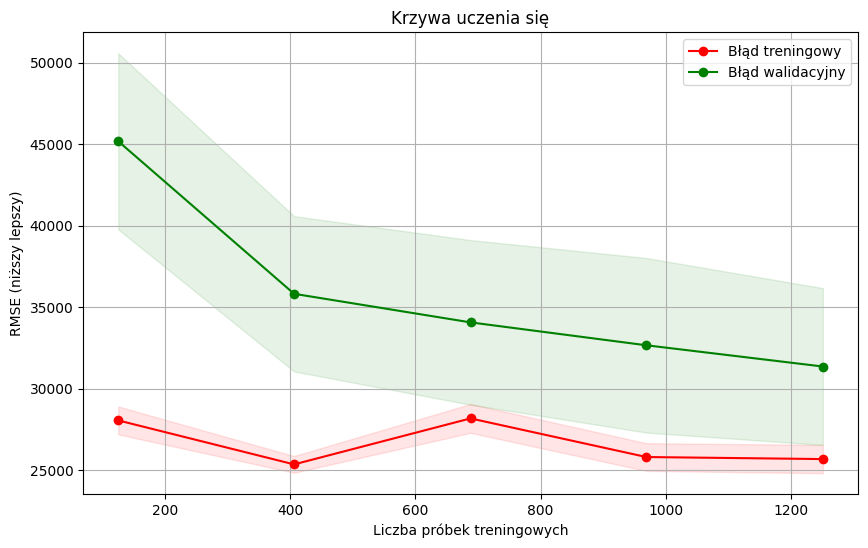

In [216]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV


param_extra_trees_rand = {
    'max_depth': randint(3, 20),                # Maksymalna głębokość drzewa
    'min_samples_split': randint(2, 20),       # Minimalna liczba próbek do podziału węzła
    'min_samples_leaf': randint(1, 10),        # Minimalna liczba próbek w liściu
    'max_leaf_nodes': randint(10, 100),        # Maksymalna liczba liści
    'min_impurity_decrease': uniform(0.0, 0.1), # Minimalna redukcja zanieczyszczenia
    'bootstrap': [False, True]                # Bootstrapping
}

model_extra_trees_rand = ExtraTreesRegressor(random_state=42)
kf = KFold(n_splits=7, shuffle= True, random_state = 42)

random_search_extra_trees = RandomizedSearchCV(
    estimator=model_extra_trees_rand, #model który bedzie optymalizowany 
    param_distributions=param_extra_trees_rand, #przestrzen hiperparametrów do przeszukania 
    n_iter=1000, #liczba losowy kombinacji parametrów do przetestowania 
    scoring=rmse_scorer, # kryterium oceny modelu
    random_state=42, # ziarno dla powtarzalnych wyników
    n_jobs=-1, # pozwala na uzycie wszystkich dostepnych procesów do równoległego przetwarzania
    cv = kf # walidacja stratyfikowana 
)


random_search_extra_trees.fit(X_train, y_train)

best_params_extra_trees = random_search_extra_trees.best_params_
best_score_extra_trees = random_search_extra_trees.best_score_
print("Najlepsze parametry:", best_params_extra_trees)

#Robie wykres uczenia sie najlepszego modelu jaki został wytrenowany
plot_learning_curve(random_search_extra_trees.best_estimator_, X, y, cv=kf)

In [217]:
fitting_model(random_search_extra_trees.best_estimator_,X, y, folds=7)

'RMSE w oryginalnej skali: 33194.56773140358, sprawnosc modelu 81.65 %'

### inne

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_grid_xgb = {
    'n_estimators': randint(low =10, high = 1000), # oznacza ilosc drzew
    'learning_rate': uniform(0.01, 0.1), # krok uczenia sie(tempo uczenia sie mniejsza wartosc oznacza wolniejsze ale bardziej stabilne uczenie)
    'max_depth': randint(low =1 , high = 7), # maksymalna głebokosc każdego drzewa wartosc None oznacza brak oganiczenia 
    'min_child_weight': randint(low =1, high = 5), #minimalna waga obserwacji dla danego węzła
    'subsample': uniform(0.6, 0.4), # podzbiór na którym model uczy sie (wtedy jak jest overfitting, zmniejsz z 1.0 do 0.8 czy nawet do 0.6).
    'colsample_bytree': uniform(0.6, 0.4), # podobnie jak sample, tylko na kolumnach (cechach). Zmniejsz wtedy gdy pojawia sie overfitting
    'reg_alpha': uniform(0, 0.1),
    'reg_lambda': randint(low =1, high = 2)
}

xgb_model_rand = xgb.XGBRegressor(random_state=42,verbosity = 0)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model_rand, #model który bedzie optymalizowany 
    param_distributions=param_grid_xgb, #przestrzen hiperparametrów do przeszukania 
    n_iter=100, #liczba losowy kombinacji parametrów do przetestowania 
    scoring='accuracy', # kryterium oceny modelu
    random_state=42, # ziarno dla powtarzalnych wyników
    n_jobs=-1, # pozwala na uzycie wszystkich dostepnych procesów do równoległego przetwarzania
    cv = skf # walidacja stratyfikowana 
)

random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_
print("Najlepsze parametry:", best_params_xgb)
print("Najlepsza dokładność:", best_score_xgb)

#Robie wykres uczenia sie najlepszego modelu jaki został wytrenowany
plot_learning_curve(random_search_xgb.best_estimator_, X, y, cv=skf)
plot_learning_curve(model_xgb, X, y, cv=7)

In [ ]:
# Przestrzeń hiperparametrów
param_distributions = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring=rmse_scorer,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Dopasowanie RandomizedSearchCV
random_search.fit(X_train, y_train)

# Wyniki
print("Najlepsze parametry:", random_search.best_params_)
print("Najlepszy wynik (RMSE):", -random_search.best_score_)

# Ocena na zbiorze testowym
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE na zbiorze testowym:", rmse)

## Trenowanie na danych testowych

RMSE w oryginalnej skali: 32058.266304181703, sprawnosc modelu 82.28 %


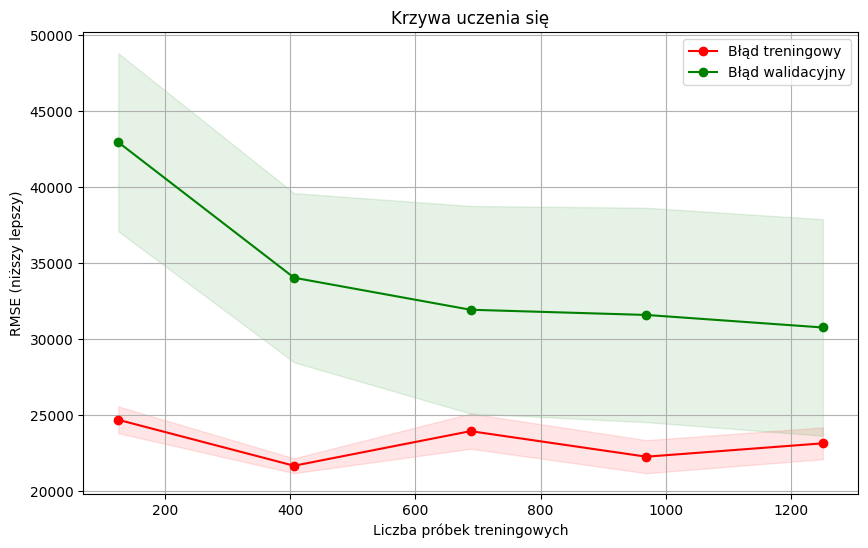

In [203]:
param_final = {
'bootstrap': True,
'max_depth': 9,
'max_leaf_nodes': 78,
'min_impurity_decrease': 0.00015651051914729043,
'min_samples_leaf': 7,
'min_samples_split': 14
}

final_model = RandomForestRegressor(**param_final, random_state=42,n_estimators=1000, n_jobs=-1)
kf = KFold(n_splits=7, shuffle= True, random_state = 42)
    
metric_rmse=[]
for train_idx, test_idx in kf.split(X,y):
    X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]
    
    final_model.fit(X_train,y_train)
    y_pred_log = final_model.predict(X_val)
        
    # Przekształcenie do oryginalnej skali
    y_val_real = np.exp(y_val)
    y_pred_real = np.exp(y_pred_log)
        
    score =  root_mean_squared_error(y_val_real, y_pred_real )
    metric_rmse.append(score)
        
baseline = 180921 #Srednia wartosc domów
avg_rmse = sum(metric_rmse)/len(metric_rmse)
capability = round(100-((avg_rmse/baseline)*100), 2)
print(f"RMSE w oryginalnej skali: {avg_rmse}, sprawnosc modelu {capability} %")
    
plot_learning_curve(final_model, X, y, cv=kf)

In [209]:
X_test= test_final.drop(['Id'], axis =1)

In [210]:
predictions = final_model.predict(X_test)

## Przygotowanie Submission

In [212]:
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predictions
})

submission.to_csv("../output/submission.csv", index = False)